#  Project : Price prediction for Cars4U data  using Linear Regression


## Context

There is a huge demand for used cars in the Indian Market today. As sales of new cars have slowed down in the recent past, the pre-owned car market has continued to grow over the past years and is larger than the new car market now. Cars4U is a budding tech start-up that aims to find footholes in this market.

In 2018-19, while new car sales were recorded at 3.6 million units, around 4 million second-hand cars were bought and sold. There is a slowdown in new car sales and that could mean that the demand is shifting towards the pre-owned market. In fact, some car sellers replace their old cars with pre-owned cars instead of buying new ones. Unlike new cars, where price and supply are fairly deterministic and managed by OEMs (Original Equipment Manufacturer / except for dealership level discounts which come into play only in the last stage of the customer journey), used cars are very different beasts with huge uncertainty in both pricing and supply. Keeping this in mind, the pricing scheme of these used cars becomes important in order to grow in the market.

##  Problem:

The data-set aims to answer the following key questions:
Does various predicting factors really affect the Price?
What are the predicting variables actually affecting the Price?
Do locations affect life Price?
Does Price has positive or negative correlation with a transmission Manual or automatic), Engine, Power and Fuel type.
Does Model and Brands have  positive or negative relationship with predicted Price?
What is the impact of kilometers driven  on life price ?
What is the years of usage  on the Price?

## Attribute Information:

S.No. : Serial Number
Name : Name of the car which includes Brand name and Model name
Location : The location in which the car is being sold or is available for purchase Cities
Year : Manufacturing year of the car
Kilometers_driven : The total kilometers driven in the car by the previous owner(s) in KM.
Fuel_Type : The type of fuel used by the car. (Petrol, Diesel, Electric, CNG, LPG)
Transmission : The type of transmission used by the car. (Automatic / Manual)
Owner : Type of ownership
Mileage : The standard mileage offered by the car company in kmpl or km/kg
Engine : The displacement volume of the engine in CC.
Power : The maximum power of the engine in bhp.
Seats : The number of seats in the car.
New_Price : The price of a new car of the same model in INR Lakhs.(1 Lakh = 100, 000)
Price : The price of the used car in INR Lakhs (1 Lakh = 100, 000)


#  Concepts to Cover
   1 Overview of the data
   2 Data Visualization
   3 Data Preparation
   4 Choose Model, Train and Evaluate
   5 Conclusion
   6 Add-on: Statsmodels

##  Import libraries

In [1]:
# Import necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# To enable plotting graphs in Jupyter notebook
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load the data into pandas dataframe
car_df=pd.read_csv('used_cars_data.csv')

In [3]:
car_df.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [4]:
#Creating backup copy
df_data=car_df.copy()

### Check number of rows and columns

In [5]:
# siz of data set
car_df.shape

(7253, 14)

### Lets us Have a look at the column names

In [6]:
car_df.columns

Index(['S.No.', 'Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'New_Price', 'Price'],
      dtype='object')

In [7]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7207 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 793.4+ KB


### Observations

There are 7253 rows and 14 columns
Mileage, Engine and Power have different  units and characters which toneed  fix
Name and Location is categorical variable and all other variables are numerical type
Dependent Variable is Price

In [8]:
# number of unique objec types in each feature columns
car_df.nunique()

S.No.                7253
Name                 2041
Location               11
Year                   23
Kilometers_Driven    3660
Fuel_Type               5
Transmission            2
Owner_Type              4
Mileage               450
Engine                150
Power                 386
Seats                   9
New_Price             625
Price                1373
dtype: int64

### Lets us look at missing values

In [9]:
# missing values in each feature columns
car_df.isnull().sum()

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                  46
Seats                  53
New_Price            6247
Price                1234
dtype: int64

# Data preprocessing

In [10]:
#  column" S.No."  is not useful for prediction so please  drop this column
car_df.drop('S.No.',axis=1,inplace=True)

In [11]:
#Unit standardization Separating from name to brand and model
car_df['Brand'] = car_df['Name'].map(lambda x : x.split(' ')[0])
car_df['Model'] = car_df['Name'].map(lambda x : x.split(' ')[1])

In [12]:
# remove the unit CC from Mileage
car_df['Mileage'] = car_df['Mileage'].apply(lambda x : str(x).split(' ')[0]).astype(float)

In [13]:
# remove the unit bhp from Power
car_df['Power'] = car_df['Power'].replace('null bhp', '0 bhp').apply(lambda x : str(x).split(" ")[0]).astype(float)

In [14]:
# remove the unit bhp from Power
car_df['Engine'] = car_df['Engine'].apply(lambda x : str(x).split(" ")[0]).astype(float)

In [15]:
# remove the unit lakh and cr from New price
car_df['New_Price'] = car_df['New_Price'].apply(lambda x : str(x).split(' ')[0]).astype(float)

In [16]:
car_df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Brand,Model
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75,Maruti,Wagon
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50,Hyundai,Creta
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50,Honda,Jazz
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00,Maruti,Ertiga
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74,Audi,A4


In [17]:
# datatypes for dataset
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage            7251 non-null   float64
 8   Engine             7207 non-null   float64
 9   Power              7207 non-null   float64
 10  Seats              7200 non-null   float64
 11  New_Price          1006 non-null   float64
 12  Price              6019 non-null   float64
 13  Brand              7253 non-null   object 
 14  Model              7253 non-null   object 
dtypes: float64(6), int64(2), object(7)
memory usage: 850.1+ KB


### Lets look at summary of our data

In [18]:
#Lets analysze the distribution of the dependent (price) column
car_df.describe()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,New_Price,Price
count,7253.000000,7.253000e+03,7251.000000,7207.000000,7207.000000,7200.000000,1006.000000,6019.000000
mean,2013.365366,5.869906e+04,18.141580,1616.573470,110.746800,5.279722,19.894324,9.479468
std,3.254421,8.442772e+04,4.562197,595.285137,55.080825,0.811660,19.813947,11.187917
min,1996.000000,1.710000e+02,0.000000,72.000000,0.000000,0.000000,1.000000,0.440000
25%,2011.000000,3.400000e+04,15.170000,1198.000000,74.000000,5.000000,7.635000,3.500000
50%,2014.000000,5.341600e+04,18.160000,1493.000000,91.720000,5.000000,11.270000,5.640000
75%,2016.000000,7.300000e+04,21.100000,1968.000000,138.030000,5.000000,23.640000,9.950000
max,2019.000000,6.500000e+06,33.540000,5998.000000,616.000000,10.000000,99.920000,160.000000


kilometer drive has outlier.


In [19]:
pd.set_option('display.float_format', lambda x: '%.3f' % x) # to display numbers in digits
car_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Name,7253,2041,Mahindra XUV500 W8 2WD,55,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location,7253,11,Mumbai,949,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,7253.000,NaN,NaN,NaN,2013.365,3.254,1996.000,2011.000,2014.000,2016.000,2019.000
Kilometers_Driven,7253.000,NaN,NaN,NaN,58699.063,84427.721,171.000,34000.000,53416.000,73000.000,6500000.000
Fuel_Type,7253,5,Diesel,3852,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Transmission,7253,2,Manual,5204,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Owner_Type,7253,4,First,5952,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mileage,7251.000,NaN,NaN,NaN,18.142,4.562,0.000,15.170,18.160,21.100,33.540
Engine,7207.000,NaN,NaN,NaN,1616.573,595.285,72.000,1198.000,1493.000,1968.000,5998.000
Power,7207.000,NaN,NaN,NaN,110.747,55.081,0.000,74.000,91.720,138.030,616.000


# Univariant analysis

In [20]:


def histogram_boxplot(feature, figsize=(10,5), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    sns.set(font_scale=2) # setting the font scale  of the seaborn
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='red') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins) if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='g', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

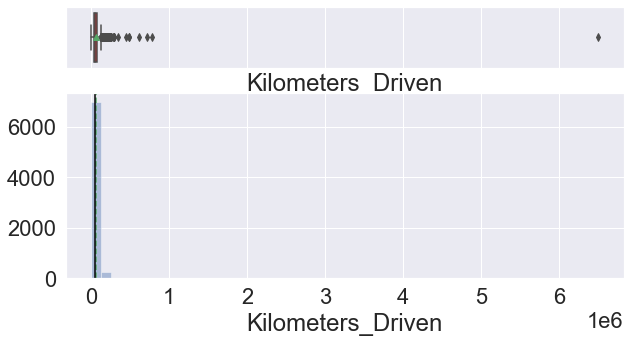

In [21]:
histogram_boxplot(car_df.Kilometers_Driven)

Kilometers driven  is right skewed and it is not normal distribution
it has lot of outliers and one outlier is 65000000km is seems to too high and need to remove from data.

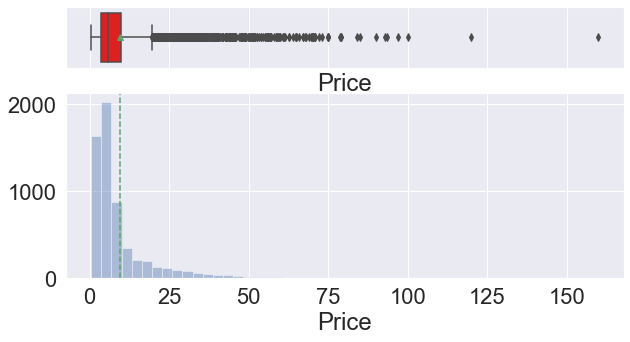

In [22]:
histogram_boxplot(car_df.Price)

Price is right skewed and it is not  normal distribution 

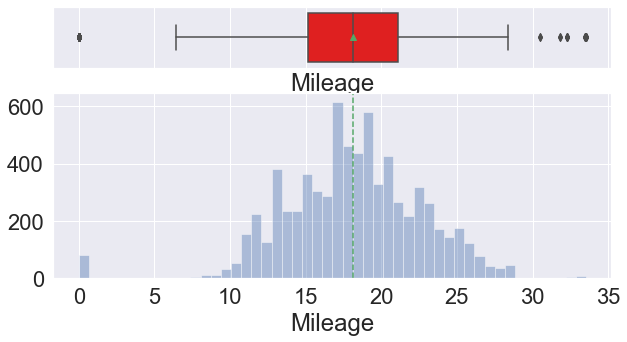

In [23]:
histogram_boxplot(car_df.Mileage)

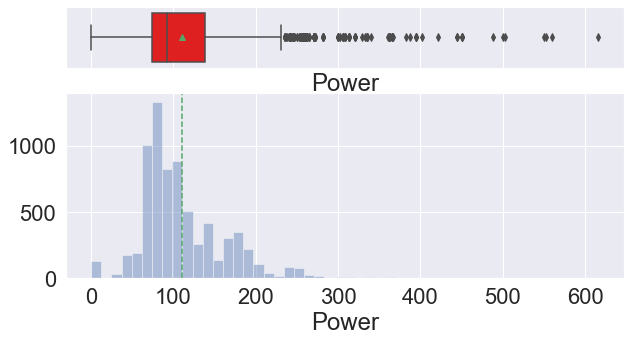

In [24]:
histogram_boxplot(car_df.Power)

Power is not normal distribution it has lot of outliers 

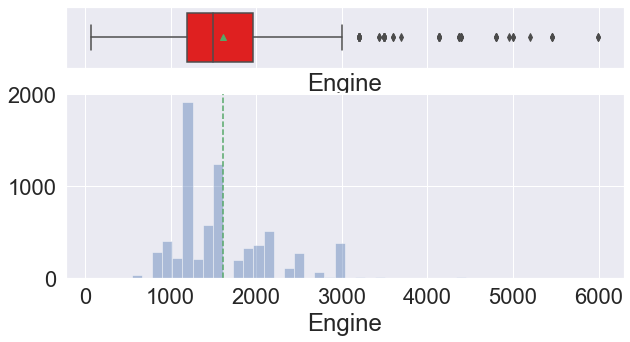

In [25]:
histogram_boxplot(car_df.Engine)

Engine is right skewed and it is not normal distribution
it has lot of outliers

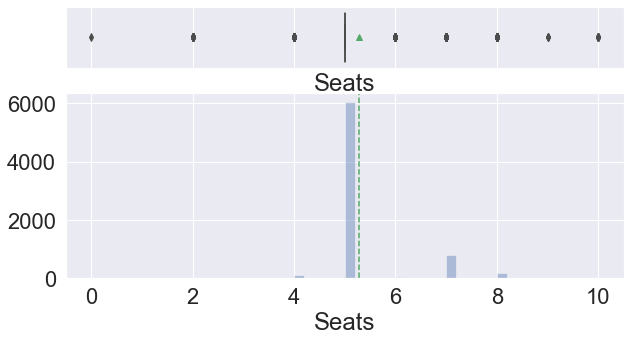

In [26]:
histogram_boxplot(car_df.Seats)

max numbers seats are 5

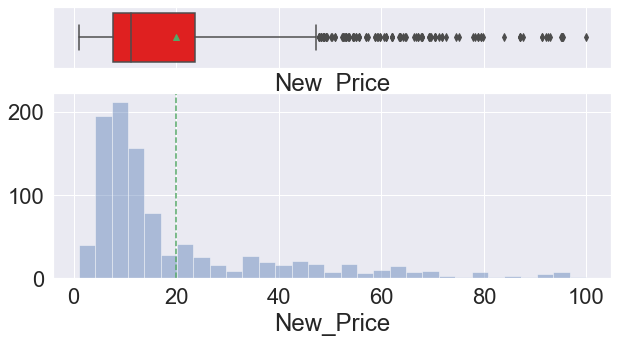

In [27]:
histogram_boxplot(car_df.New_Price)

New_Price is not normal distribution it has lot of outliers

<AxesSubplot:xlabel='Transmission', ylabel='count'>

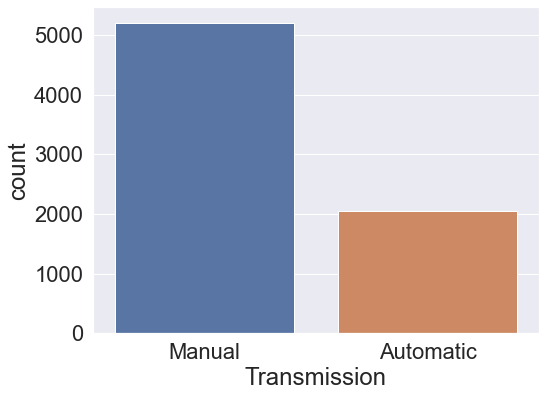

In [28]:
plt.figure(figsize=(8, 6))
sns.countplot('Transmission', data=car_df)

Most cars have manual transmission.

<AxesSubplot:xlabel='Fuel_Type', ylabel='count'>

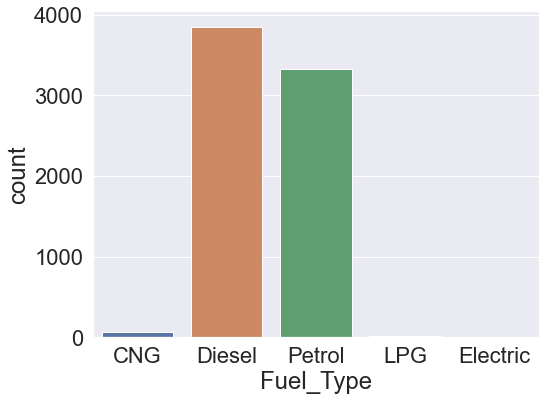

In [29]:
plt.figure(figsize=(8, 6))
sns.countplot('Fuel_Type', data=car_df)

CNG and LPG are not much popular in India.

<AxesSubplot:xlabel='Owner_Type', ylabel='count'>

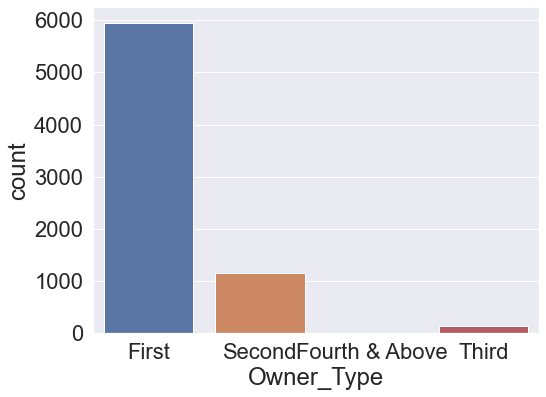

In [30]:
plt.figure(figsize=(8, 6))
sns.countplot('Owner_Type', data=car_df)

Most people prefered the single user car.

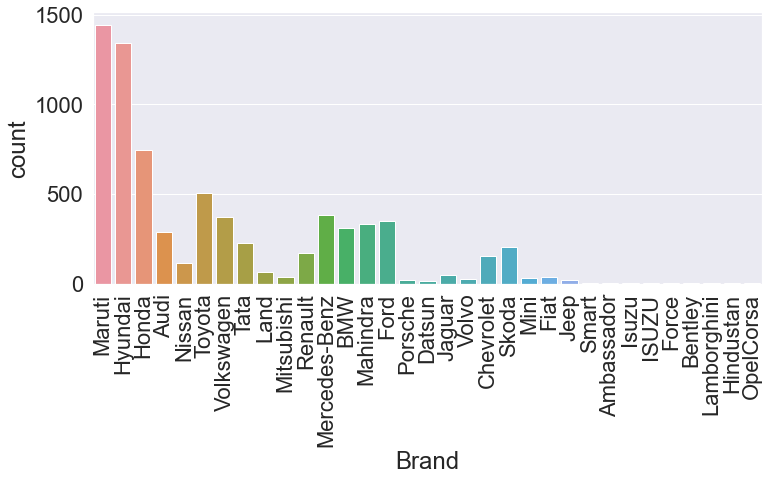

In [31]:
plt.figure(figsize=(12, 5))
car_df2 = sns.countplot(x='Brand',data=car_df)
loc,labels = plt.xticks()
car_df2.set_xticklabels(labels,rotation=90);

The highest number of cars owned by people is of brand Maruti and and Hyundai

# Bivariant analysis

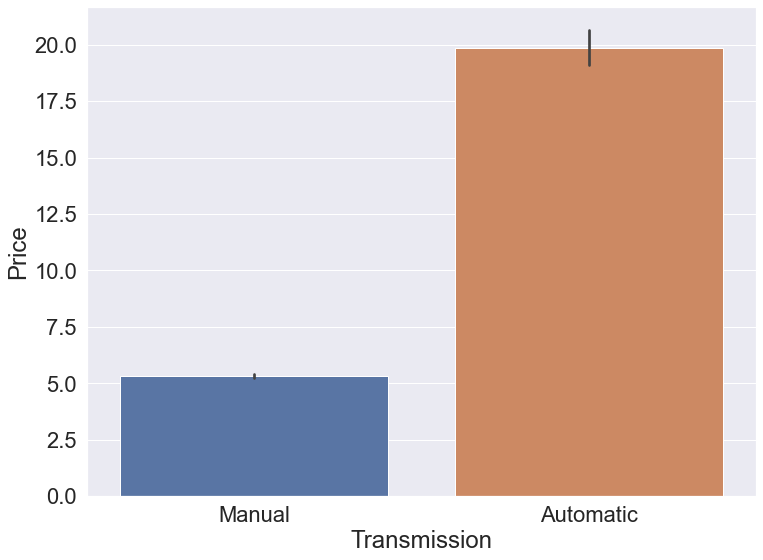

In [32]:
plt.figure(figsize=(12, 9))
sns.barplot('Transmission', 'Price', data=car_df);

Cleary from graph of Price vs Transimission Automatic cars have higher prices than Manual type.

<AxesSubplot:xlabel='Transmission', ylabel='Price'>

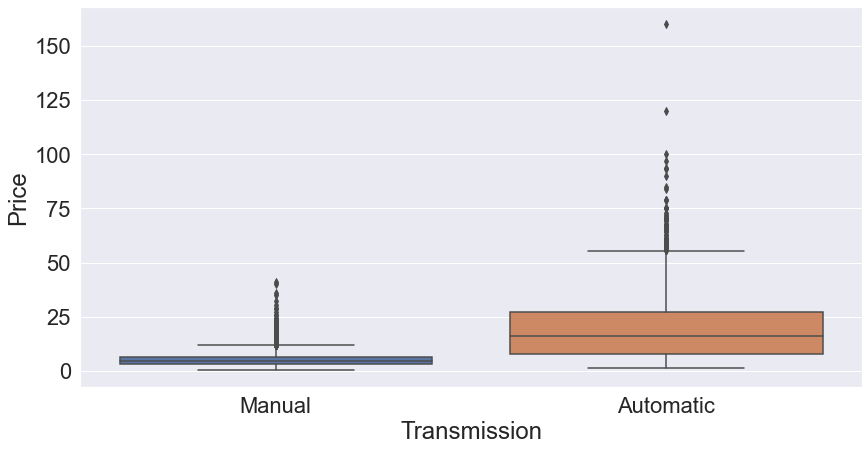

In [33]:
plt.subplots(figsize=(14,7))
sns.boxplot(x='Transmission',y='Price',data=car_df)

 Automatic cars have a more outliers than manual.


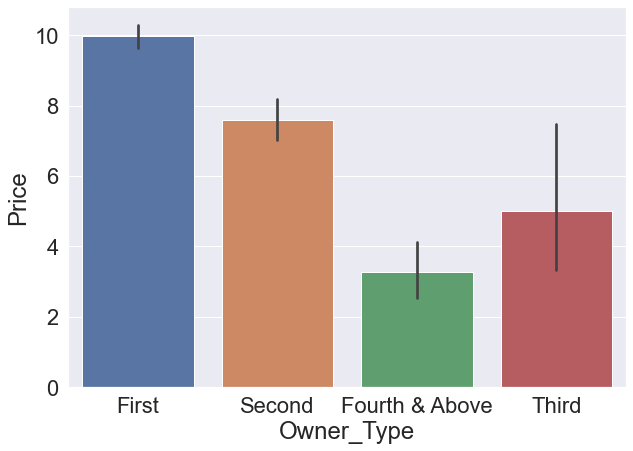

In [34]:
plt.figure(figsize=(10, 7))
sns.barplot('Owner_Type', 'Price', data=car_df);

Cleary from graph of Price vs Owner_type .First owner cars have higher prices. 

<AxesSubplot:xlabel='Owner_Type', ylabel='Price'>

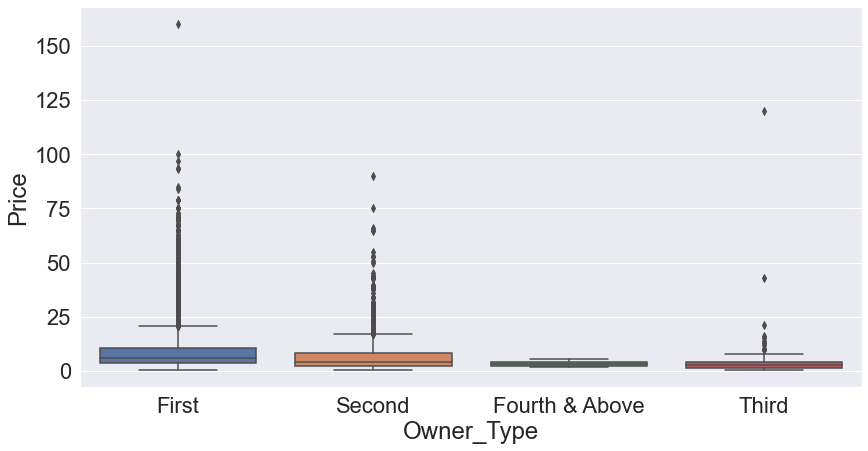

In [35]:
plt.subplots(figsize=(14,7))
sns.boxplot(x='Owner_Type',y='Price',data=car_df)

First hand cars have a more outliers  than others.

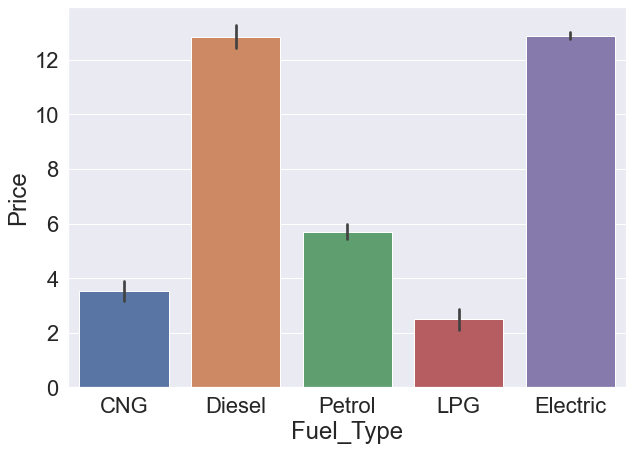

In [36]:
plt.figure(figsize=(10, 7))
sns.barplot('Fuel_Type', 'Price', data=car_df);

According to our datasheet price of Diesel and Electric type of cars is highest below that price is Petrol type cars. while CNG and LPG car type prices are lowest.

<AxesSubplot:xlabel='Fuel_Type', ylabel='Price'>

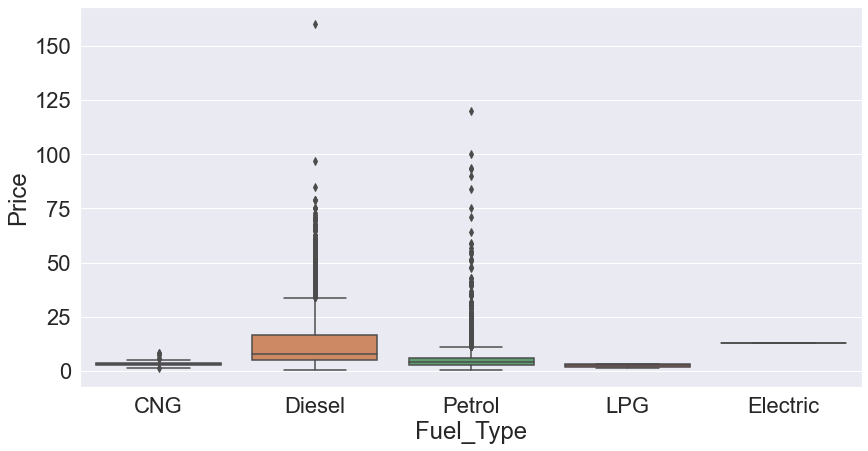

In [37]:
plt.subplots(figsize=(14,7))
sns.boxplot(x='Fuel_Type',y='Price',data=car_df)

Diesel and Petrol cars are have a more outliers  than others.

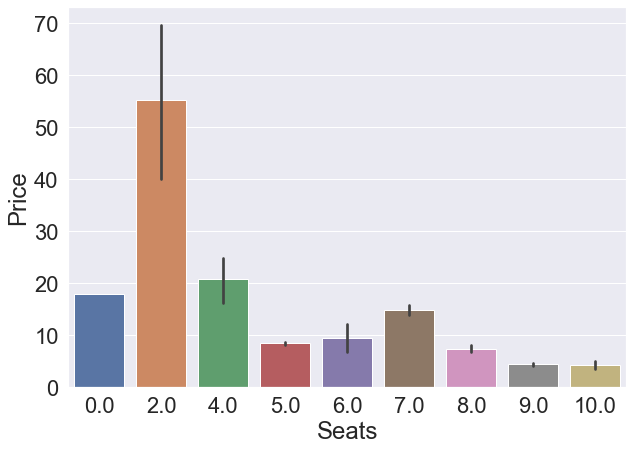

In [38]:
plt.figure(figsize=(10, 7))
sns.barplot('Seats', 'Price', data=car_df);

Two seater cars has the Highest prices and as the seats increases in cars the prices decreases.

<AxesSubplot:xlabel='Brand'>

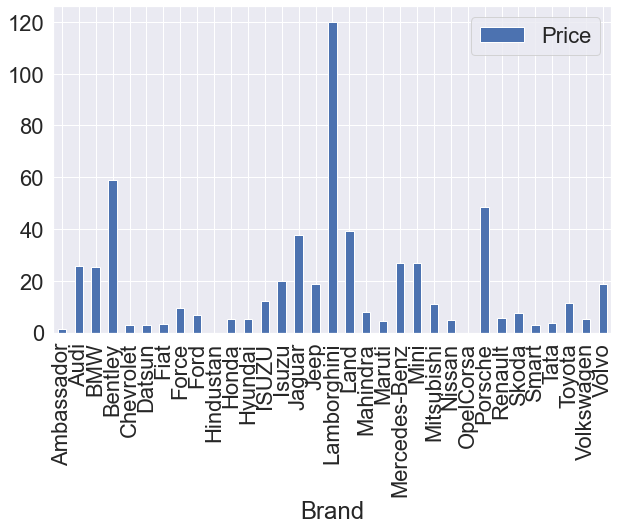

In [39]:
car_df1 = pd.DataFrame(car_df.groupby('Brand')['Price'].mean())
car_df1.plot.bar(figsize=(10, 6))

The Highest price of car is Lamborghini and lowest price of car is Maruti

The Price of cars increases gradually year by year except the price drops slightly in year 2007

<AxesSubplot:xlabel='Year', ylabel='count'>

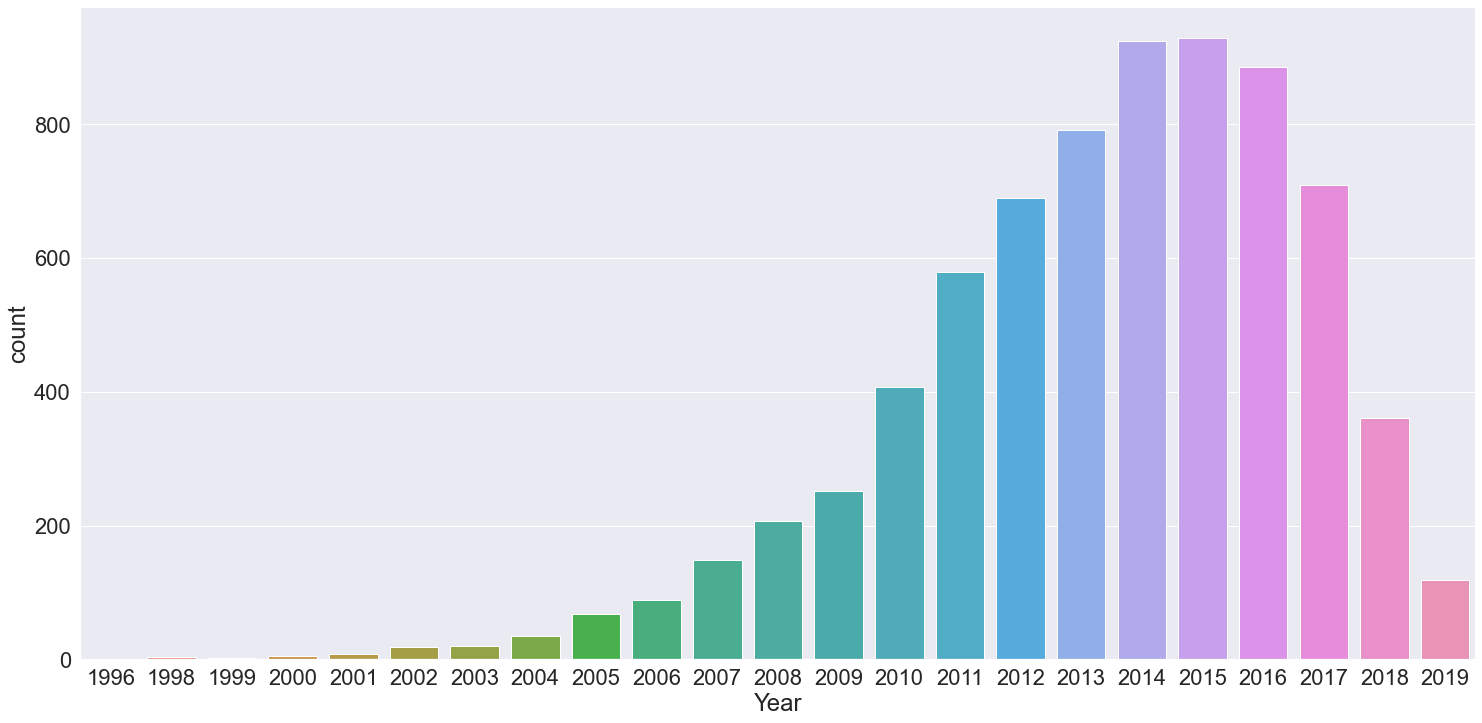

In [40]:
plt.figure(figsize=(25, 12))
sns.countplot('Year', data=car_df)

Year 2014 and 2015 have a max numbers of cars sales.

<AxesSubplot:xlabel='Location', ylabel='Price'>

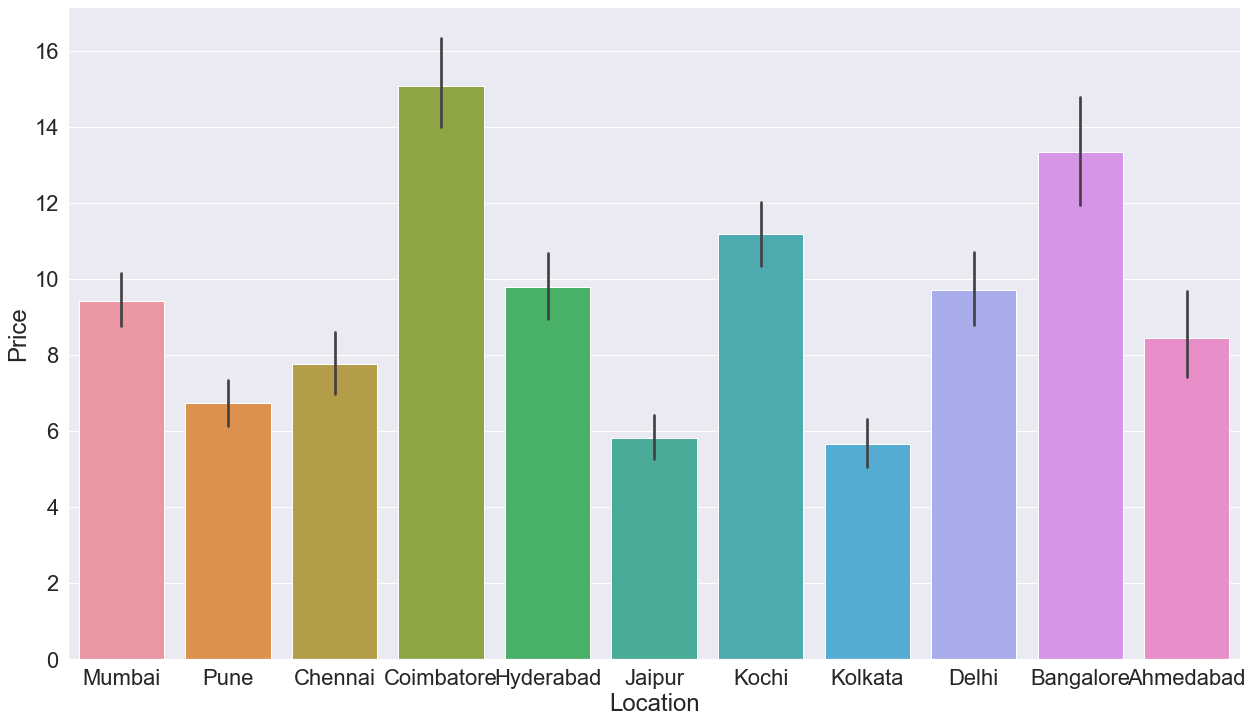

In [41]:
plt.figure(figsize=(21, 12))
sns.barplot('Location', 'Price', data=car_df)


Price of cars are highest in Coimbatore and Banglore while lowest in Jaipur and kolkata.

<AxesSubplot:xlabel='Location', ylabel='count'>

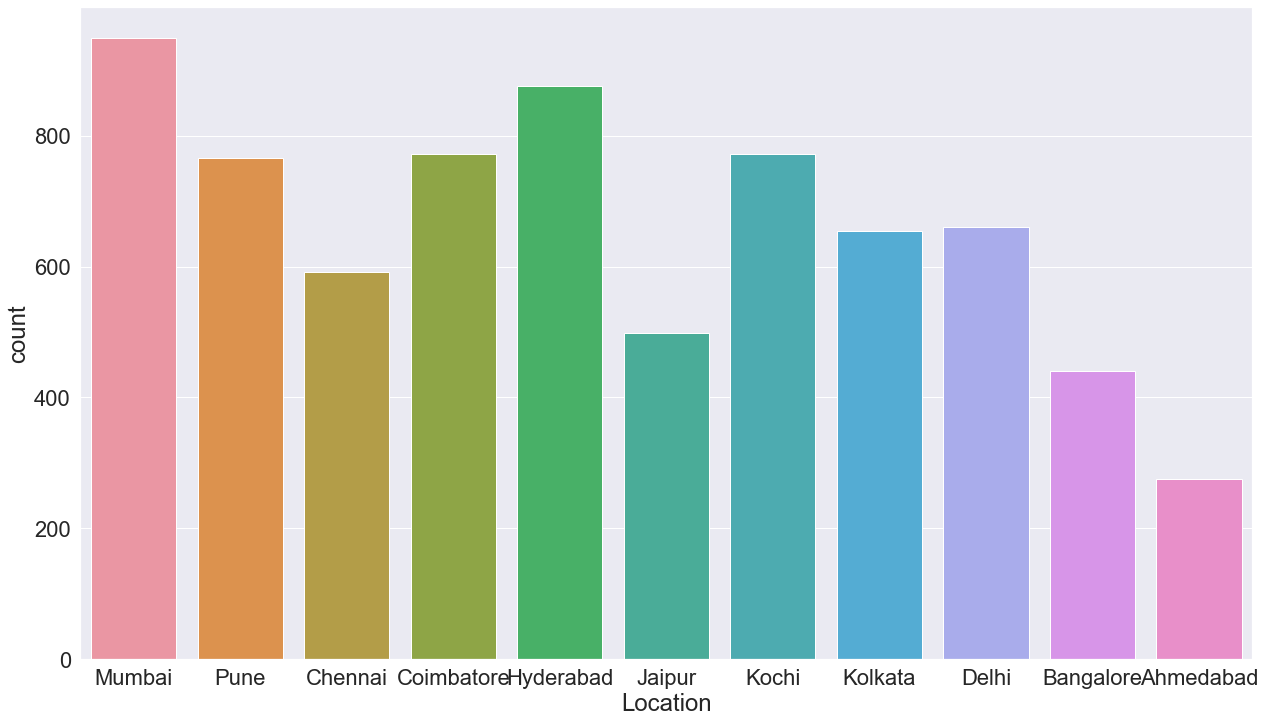

In [42]:
plt.figure(figsize=(21, 12))
sns.countplot('Location', data=car_df)

In Mumbai and Hyderabad are sold more cars.
Ahmedabad sold less cars.

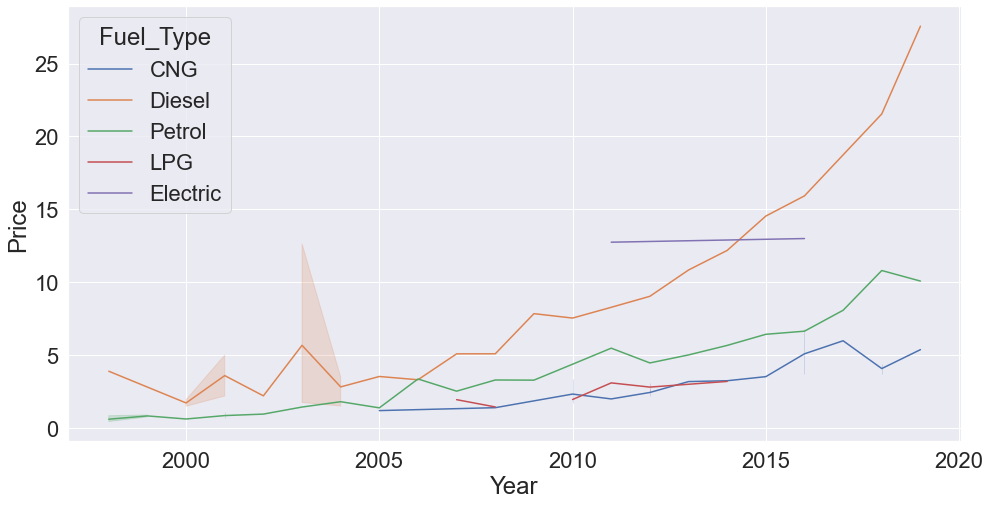

In [43]:
# How does Price vary year by year with respective to Fuel type
plt.figure(figsize=(16,8))
sns.lineplot(x='Year', y='Price',hue='Fuel_Type',data=car_df);

Diesel car prices are increases over the years than others.

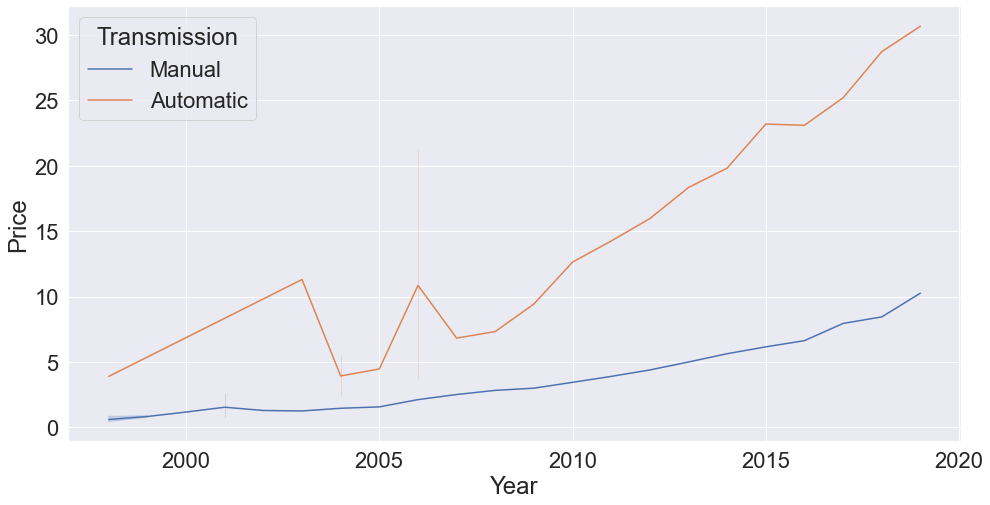

In [44]:
# How does Price vary year by year with respective to transmission
plt.figure(figsize=(16,8))
sns.lineplot(x='Year', y='Price',hue='Transmission',data=car_df);

Automatic cars prices are increases over the years than manual type.

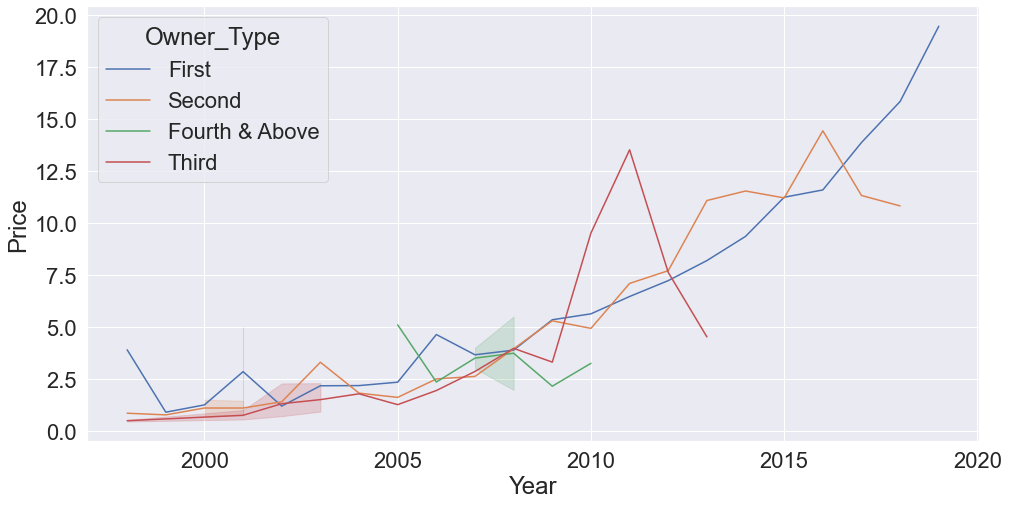

In [45]:
# How does Price vary year by year with respective to Owner type
plt.figure(figsize=(16,8))
sns.lineplot(x='Year', y='Price',hue='Owner_Type',data=car_df);

First hand car prices are increases over the years than others.

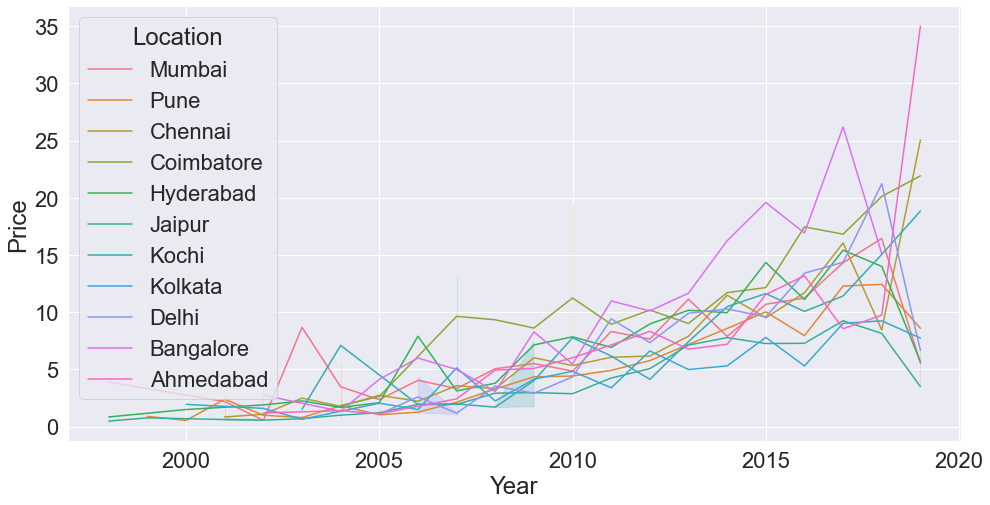

In [46]:
# How does Price vary year by year with respective to Location
plt.figure(figsize=(16,8))
sns.lineplot(x='Year', y='Price',hue='Location',data=car_df);

For all locations car prices are increases.

<AxesSubplot:xlabel='Power', ylabel='Price'>

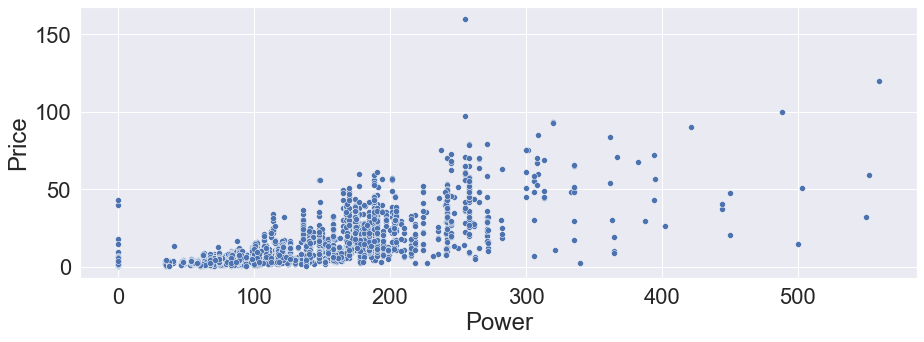

In [47]:
# How does Price vary  against to Power

plt.figure(figsize = (15,5))
sns.scatterplot(x = car_df["Power"], y = car_df["Price"])

<AxesSubplot:xlabel='Engine', ylabel='Price'>

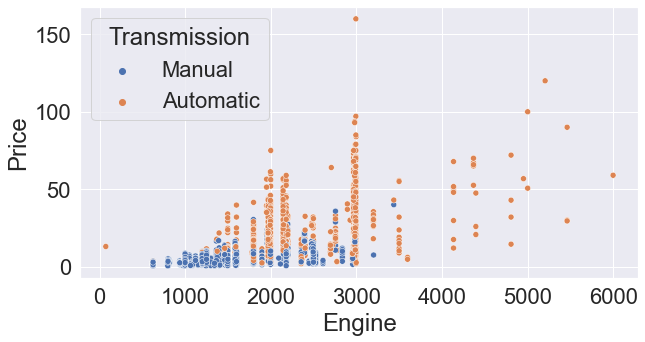

In [48]:
# How does Price vary  against to Power

plt.figure(figsize = (10,5))
sns.scatterplot(x = car_df["Engine"], y = car_df["Price"],hue='Transmission', data=car_df)

smaller engine  with  manual cars have a lower price.

<AxesSubplot:xlabel='Fuel_Type', ylabel='Price'>

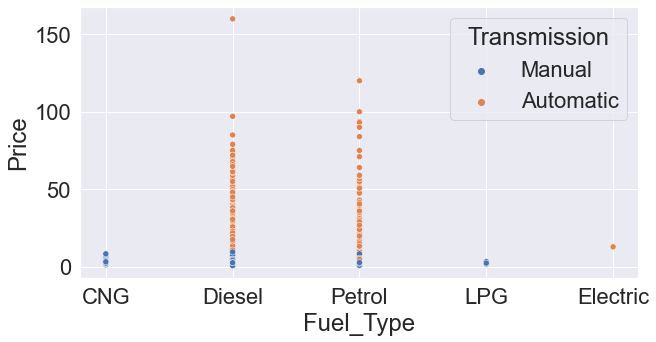

In [49]:
# How does Price vary  against to Power

plt.figure(figsize = (10,5))
sns.scatterplot(x = car_df["Fuel_Type"], y = car_df["Price"],hue='Transmission', data=car_df)

all cars with manual type have a lower price.

# Multivariant analysis

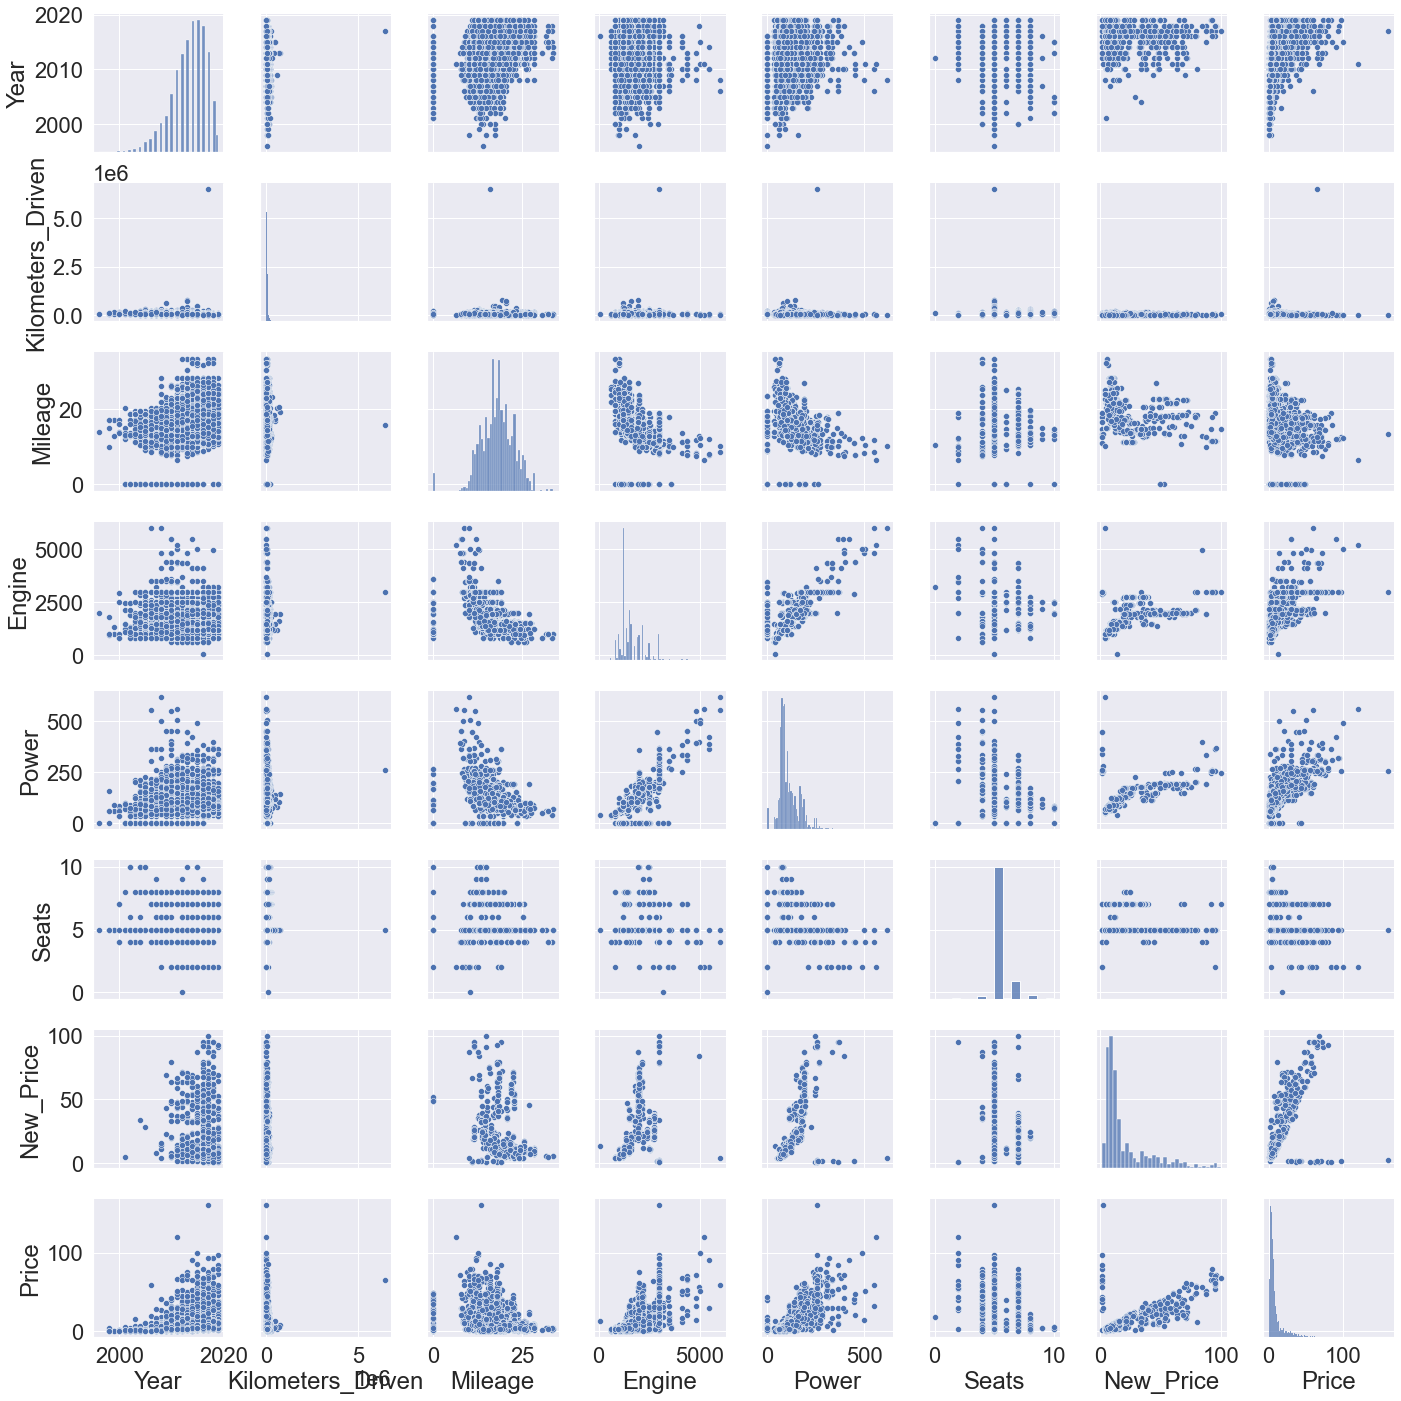

In [50]:
# Let us do a correlation analysis among the different features and also each features with the dependent dimension
# This is done using scatter matrix function which creates a dashboard reflecting useful information about the features
# The result can be stored as a .png file and opened in say, paint to get a larger view 

sns.pairplot(car_df)

#The data distribution across various dimensions except 'Mileage' do not look normal
#Close observation between 'price' and other attributes indicate the relationship is not really linear
#How about 'price' vs 'yr' surprising to see a positive relation

<AxesSubplot:>

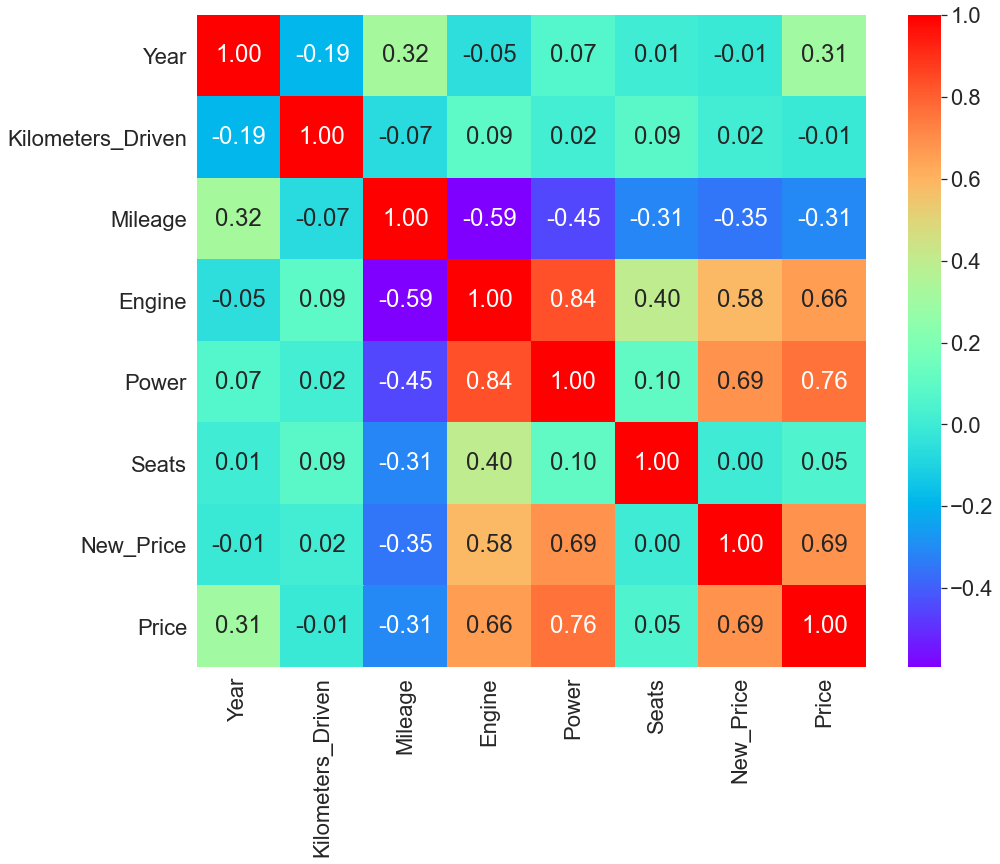

In [51]:
plt.figure(figsize=(15,12))
sns.heatmap(car_df.corr(),annot=True,fmt='.2f',cmap='rainbow')

Price is highly negatively correlated with Kilometer driven and Mileage, which means that as kilometer driven and Mileage increases,Price ofcar tend to decrease
Price is highly positively correlated with Engine  and power of the car.which means more power engine will have high Price.

In [52]:
car_df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Brand,Model
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.600,998.000,58.160,5.000,nan,1.750,Maruti,Wagon
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.670,1582.000,126.200,5.000,nan,12.500,Hyundai,Creta
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.200,1199.000,88.700,5.000,8.610,4.500,Honda,Jazz
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.770,1248.000,88.760,7.000,nan,6.000,Maruti,Ertiga
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.200,1968.000,140.800,5.000,nan,17.740,Audi,A4


In [53]:
df=car_df

In [54]:

# converting the Location column from object / string type to category
#car_df['Location'] = car_df['Location'].astype('category')
# converting the Fuae_Type column from object / string type to category
#car_df['Fuel_Type'] = car_df['Fuel_Type'].astype('category')
# converting the Transmission column from object / string type to category
#car_df['Transmission'] = car_df['Transmission'].astype('category')
# converting the 'Owner' column from object / string type to category
#car_df['Owner_Type'] = car_df['Owner_Type'].astype('category')

# Outliers Treatment


In kilometer driven column there one outlier with 65000000km .we need remove this because it seems to be typo error 
for 2017 model it not possible drive that much and also  not possible build the  the car for that much km.


In [55]:
# Lets treat outliers by flooring and capping
def treat_outliers(df,col):
    '''
    treats outliers in a varaible
    col: str, name of the numerical varaible
    df: data frame
    col: name of the column
    '''
    Q1=df[col].quantile(0.25) # 25th quantile
    Q3=df[col].quantile(0.75)  # 75th quantile
    IQR=Q3-Q1
    Lower_Whisker = Q1 - 1.5*IQR 
    Upper_Whisker = Q3 + 1.5*IQR
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker) # all the values samller than Lower_Whisker will be assigned value of Lower_whisker 
                                                            # and all the values above upper_whishker will be assigned value of upper_Whisker 
    return df

def treat_outliers_all(df, col_list):
    '''
    treat outlier in all numerical varaibles
    col_list: list of numerical varaibles
    df: data frame
    '''
    for c in col_list:
        df = treat_outliers(df,c)
        
    return df
    

In [56]:
numerical_col = df.select_dtypes(include=np.number).columns.tolist()

In [57]:
df = treat_outliers_all(df,numerical_col)

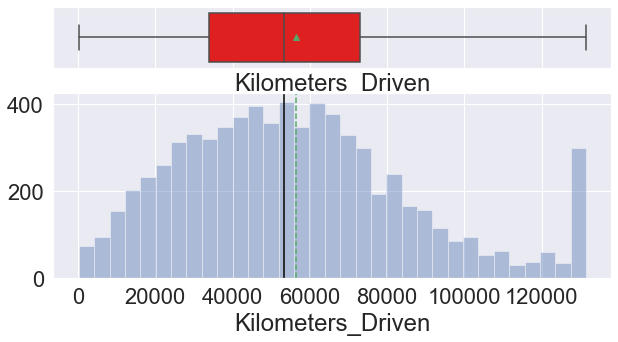

In [58]:
histogram_boxplot(df.Kilometers_Driven)

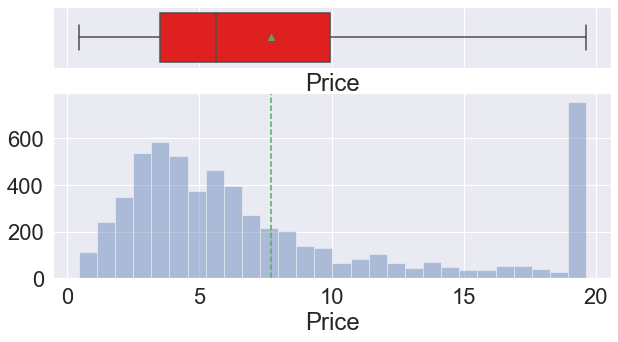

In [59]:
histogram_boxplot(df.Price)

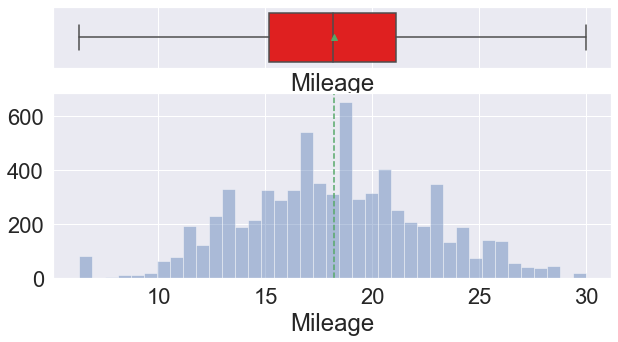

In [60]:
histogram_boxplot(df.Mileage)

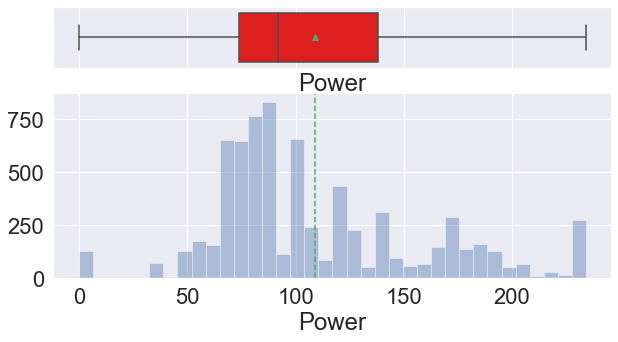

In [61]:
histogram_boxplot(df.Power)

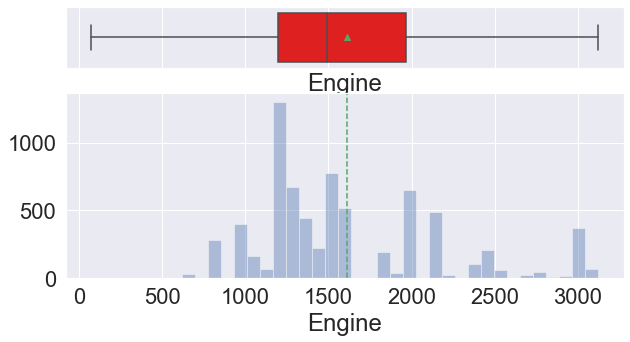

In [62]:
histogram_boxplot(df.Engine)

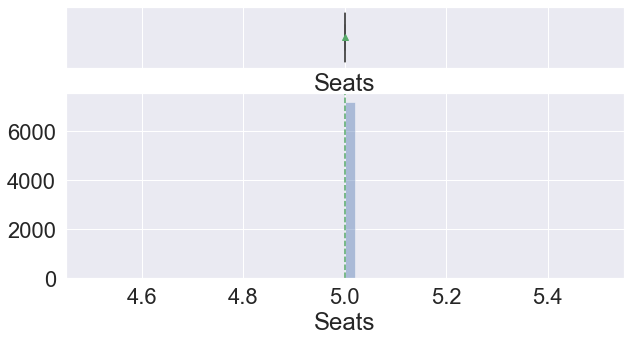

In [63]:
histogram_boxplot(df.Seats)

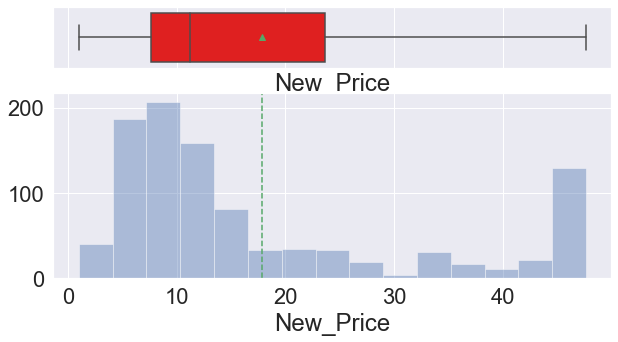

In [64]:
histogram_boxplot(df.New_Price)

Outliers has been treated

# Missing values Treatment

In [65]:
# we will replace missing values in Mileage with its medain

df["Mileage"].fillna(df["Mileage"].median(),inplace=True)


In [66]:
# we will replace missing values in Engine with its medain
df["Engine"].fillna(df["Engine"].median(),inplace=True)

In [67]:
# we will replace missing values in Power with its medain
df["Power"].fillna(df["Power"].median(),inplace=True)

In [68]:
# we will replace missing values in Power with its medain
df["Seats"].fillna(df["Seats"].median(),inplace=True)

In [69]:
# we will replace missing values in Power with its medain
#df["Price"].fillna(df["Price"].mean(),inplace=True)

In [70]:
df.drop(['Name'], axis=1,inplace = True)

In [71]:
df.drop(['Brand'], axis=1,inplace = True)

In [72]:
df.drop(['Model'], axis=1,inplace = True)

In [73]:
# we will replace missing values in Power with its medain
df["New_Price"].fillna(car_df["New_Price"].mean(),inplace=True)

In [74]:
df.dropna( axis=0,inplace = True)

In [75]:
car_df.isnull().sum()

Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
New_Price            0
Price                0
dtype: int64

# Create Dummy Variables

In [76]:
# we will replModelace missing values in Power with its medain
#car_df.drop(['New_Price'], axis=1,inplace = True)

In [77]:
# Create Dummy Variables Using get dummies.
df_final=pd.get_dummies(df,drop_first=True)

# Model Building

In [78]:
df_final.head()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,New_Price,Price,Location_Bangalore,Location_Chennai,...,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,2010.000,72000,26.600,998.000,58.160,5.000,17.815,1.750,0,0,...,1,0,0,0,0,0,1,0,0,0
1,2015.000,41000,19.670,1582.000,126.200,5.000,17.815,12.500,0,0,...,0,1,1,0,0,0,1,0,0,0
2,2011.000,46000,18.200,1199.000,88.700,5.000,8.610,4.500,0,1,...,0,0,0,0,0,1,1,0,0,0
3,2012.000,87000,20.770,1248.000,88.760,5.000,17.815,6.000,0,1,...,0,0,1,0,0,0,1,0,0,0
4,2013.000,40670,15.200,1968.000,140.800,5.000,17.815,17.740,0,0,...,0,0,1,0,0,0,0,0,1,0


In [79]:
#Defining X and y variables
X = df_final.drop(['Price'], axis=1)
y = df_final[['Price']]

print(X.head())
print(y.head())



      Year  Kilometers_Driven  Mileage   Engine   Power  Seats  New_Price  \
0 2010.000              72000   26.600  998.000  58.160  5.000     17.815   
1 2015.000              41000   19.670 1582.000 126.200  5.000     17.815   
2 2011.000              46000   18.200 1199.000  88.700  5.000      8.610   
3 2012.000              87000   20.770 1248.000  88.760  5.000     17.815   
4 2013.000              40670   15.200 1968.000 140.800  5.000     17.815   

   Location_Bangalore  Location_Chennai  Location_Coimbatore  ...  \
0                   0                 0                    0  ...   
1                   0                 0                    0  ...   
2                   0                 1                    0  ...   
3                   0                 1                    0  ...   
4                   0                 0                    1  ...   

   Location_Mumbai  Location_Pune  Fuel_Type_Diesel  Fuel_Type_Electric  \
0                1              0              

In [80]:
X.shape

(6019, 25)

In [81]:
y.shape

(6019, 1)

In [82]:
#split the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Choose Model, Train and Evaluate

In [83]:
from sklearn.linear_model import LinearRegression
linearregression = LinearRegression()                                    
linearregression.fit(X_train, y_train)                               

print("Intercept of the linear equation:", linearregression.intercept_) 
print("\nCOefficients of the equation are:", linearregression.coef_)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

pred = linearregression.predict(X_test)                              

Intercept of the linear equation: [-1014.57743007]

COefficients of the equation are: [[ 5.07241020e-01 -2.20559655e-05 -1.79824245e-01  1.32670543e-03
   4.42698517e-02  3.77475828e-15  7.48451814e-02  7.07104694e-01
  -4.02178335e-02  5.35861987e-01 -5.26285053e-01  6.07465911e-01
   1.43727683e-02 -1.73825410e-01 -1.43296332e+00 -5.71904773e-01
  -1.26602547e-01  3.79359162e-01  6.46117416e+00 -1.11404493e+00
  -1.99560763e+00 -2.68980342e+00 -5.16653681e-01 -2.60173632e-01
  -3.98551463e-01]]


In [84]:
# Mean Absolute Error on test
mean_absolute_error(y_test, pred)


1.7704747672107588

The mean absolute error (MAE) is the simplest regression error metric to understand. We'll calculate the residual for every data point, taking only the absolute value of each so that negative and positive residuals do not cancel out. We then take the average of all these residuals. Effectively, MAE describes the typical magnitude of the residuals.

In [85]:
# RMSE on test data
mean_squared_error(y_test, pred)**0.5

2.400225350292557

The root mean square error (RMSE) is just like the MAE, 
but squares the difference before summing them all instead of using the absolute value. 
And then takes the square root of the value.

In [86]:
# R2 Squared: on test
r2_score(y_test, pred)

0.8301580483210085

### ## R^2 (coefficient of determination) regression score function.

Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). A constant model that always predicts the expected value of y, disregarding the input features, would get a R^2 score of 0.0.

R^2 value is 0.83 which means that in this model independent variables are able to explain 83% of variances in dependent variable

# Conclusion
The Training and testing scores are around 83% and both scores are comparable, hence the model is a good fit.

R2_score is 0.83, that explains 83% of total variation in the dataset. So, overall the model is very satisfactory.


# Add-on: statsmodels

Here is the complete syntax to perform the linear regression in Python using statsmodels.
Statsmodels is a Python module that provides functions for the estimation of many statistical models, as well as for conducting statistical tests, and statistical data exploration

In [87]:
X = sm.add_constant(X)
X_train1, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

olsmod0 = sm.OLS(y_train, X_train1)
olsres0 = olsmod0.fit()
print(olsres0.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     875.3
Date:                Fri, 09 Apr 2021   Prob (F-statistic):               0.00
Time:                        11:02:34   Log-Likelihood:                -9564.2
No. Observations:                4213   AIC:                         1.918e+04
Df Residuals:                    4188   BIC:                         1.934e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Year                  

### ** Observation**

P value of a variable indicates if the variable is significant or not. If we consider significance level to be 0.05 (5%) than any variable with p-values less than 0.05 would be considered significant.
Negative values of coefficient shows that, Prices deceases with their increase.
Positive values of coefficient shows that, prices inceases with their increase.
But these variables might contain Multicollinearity which affects the p values, so we first need to deal with multicollinearity and then look for p values

Interpreting the Regression Results:
Adjusted. R-squared: It reflects the fit of the model.


R-squared values range from 0 to 1, where a higher value generally indicates a better fit, assuming certain conditions are met.
In our case, the value for Adj. R-squared is 0.830, which is good!
const coefficient is the y-intercept.

It means that if all the dependent variables (features: like Year, enigne, Fuel type and so on..) coefficients are zero, then the expected output (i.e., the y) would be equal to the const coefficient.



std err: It reflects the level of accuracy of the coefficients.

The lower it is, the higher is the level of accuracy.
P >|t|: It is p-value.

Pr(>|t|) : For each independent feature there is a null hypothesis and alternate hypothesis

Ho : Independent feature is not significant

Ha : Independent feature is that it is significant

Pr(>|t|) gives P-value for each independent feature to check that null hypothesis. we are considering 0.05 (5%) as significance level

A p-value of less than 0.05 is considered to be statistically significant.
Confidence Interval: It represents the range in which our coefficients are likely to fall (with a likelihood of 95%).


###  Checking the Linear Regression Assumptions

No Multicollinearity
Mean of residuals should be 0
No Heteroscedacity
Linearity of variables
Normality of error terms


Let's check Multicollinearity using VIF scores


TEST FOR MULTICOLLINEARITY
Multicollinearity occurs when predictor variables in a regression model are correlated. This correlation is a problem because predictor variables should be independent. If the correlation between variables is high, it can cause problems when we fit the model and interpret the results. When we have multicollinearity the linear model, The coefficients that the model suggests are unreliable.

There are different ways of detecting(or testing) multi-collinearity, one such way is Variation Inflation Factor.

Variance Inflation factor: Variance inflation factors measure the inflation in the variances of the regression parameter estimates due to collinearities that exist among the predictors. It is a measure of how much the variance of the estimated regression coefficient βkis “inflated”by the existence of correlation among the predictor variables in the model.

General Rule of thumb: If VIF is 1 then there is no correlation among the kth predictor and the remaining predictor variables, and hence the variance of β̂k is not inflated at all. Whereas if VIF exceeds 5 or is close to exceeding 5, we say there is moderate VIF and if it is 10 or exceeding 10, it shows signs of high multi-collinearity.

In [88]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_series1 = pd.Series([variance_inflation_factor(X.values,i) for i in range(X.shape[1])],index=X.columns)
print('Series before feature selection: \n\n{}\n'.format(vif_series1))

Series before feature selection: 

Year                             2.043
Kilometers_Driven                1.857
Mileage                          2.989
Engine                           6.485
Power                            4.647
Seats                       800016.336
New_Price                        1.117
Location_Bangalore               2.473
Location_Chennai                 2.993
Location_Coimbatore              3.518
Location_Delhi                   3.168
Location_Hyderabad               3.826
Location_Jaipur                  2.684
Location_Kochi                   3.571
Location_Kolkata                 3.136
Location_Mumbai                  3.991
Location_Pune                    3.443
Fuel_Type_Diesel                28.266
Fuel_Type_Electric               1.043
Fuel_Type_LPG                    1.193
Fuel_Type_Petrol                28.800
Transmission_Manual              1.863
Owner_Type_Fourth & Above        1.013
Owner_Type_Second                1.171
Owner_Type_Third             

#### Seats, Fuel_Type_Petrol and Fuel_Type_Diesel ,engine have a VIF score of much greater than 5
#### clearly these 2 variables are correlated with each other
#### Engine and  power  have a VIF score of much greater than 5  clearly these 2 variables are correlated with each other                      


### Removing Multicollinearity

To remove multicollinearity

1 Drop every column one by one, that has VIF score greater than 5.

2 Look at the adjusted R square of all these models

3 Drop the Variable that makes least change in Adjusted-R square

4.Check the VIF Scores again

5 Continue till you get all VIF scores under 5

In [89]:
# we drop the one with the highest vif values and check the Adjusted-R Squared
X_train2 = X_train1.drop('Seats', axis=1)
vif_series2 = pd.Series([variance_inflation_factor(X_train2.values,i) for i in range(X_train2.shape[1])],index=X_train2.columns)
print('Series before feature selection: \n\n{}\n'.format(vif_series2))

Series before feature selection: 

Year                        334.367
Kilometers_Driven             6.430
Mileage                      55.102
Engine                       59.836
Power                        27.861
New_Price                    13.331
Location_Bangalore            2.753
Location_Chennai              3.262
Location_Coimbatore           3.955
Location_Delhi                3.578
Location_Hyderabad            4.443
Location_Jaipur               2.885
Location_Kochi                4.043
Location_Kolkata              3.499
Location_Mumbai               4.632
Location_Pune                 3.930
Fuel_Type_Diesel             60.726
Fuel_Type_Electric            1.041
Fuel_Type_LPG                 1.227
Fuel_Type_Petrol             53.784
Transmission_Manual           6.554
Owner_Type_Fourth & Above     1.009
Owner_Type_Second             1.316
Owner_Type_Third              1.092
dtype: float64



That seemed to have helped -  but still  some feature are added  in vif .

In [90]:
olsmod1 = sm.OLS(y_train, X_train2)
olsres1 = olsmod1.fit()
print(olsres1.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Price   R-squared (uncentered):                   0.927
Model:                            OLS   Adj. R-squared (uncentered):              0.927
Method:                 Least Squares   F-statistic:                              2215.
Date:                Fri, 09 Apr 2021   Prob (F-statistic):                        0.00
Time:                        11:03:03   Log-Likelihood:                         -10004.
No. Observations:                4213   AIC:                                  2.006e+04
Df Residuals:                    4189   BIC:                                  2.021e+04
Df Model:                          24                                                  
Covariance Type:            nonrobust                                                  
                                coef    std err          t      P>|t|      [0.025      0.975]
--------------------------

#### Earlier R-squared was 0.834, now it is increase  to 0927 - this seems quite good!
#### After droping  seats R-squared is increase to  0.927
#### To check this let's make a new model afte dropping year

In [91]:
# we drop the one with the highest vif values
X_train3 = X_train2.drop('Year', axis=1)
vif_series3 = pd.Series([variance_inflation_factor(X_train3.values,i) for i in range(X_train3.shape[1])],index=X_train3.columns)
print('Series before feature selection: \n\n{}\n'.format(vif_series3))

Series before feature selection: 

Kilometers_Driven            6.249
Mileage                     27.107
Engine                      44.679
Power                       27.833
New_Price                   12.826
Location_Bangalore           2.606
Location_Chennai             3.121
Location_Coimbatore          3.727
Location_Delhi               3.393
Location_Hyderabad           4.199
Location_Jaipur              2.770
Location_Kochi               3.805
Location_Kolkata             3.323
Location_Mumbai              4.307
Location_Pune                3.693
Fuel_Type_Diesel            41.147
Fuel_Type_Electric           1.013
Fuel_Type_LPG                1.114
Fuel_Type_Petrol            27.580
Transmission_Manual          6.355
Owner_Type_Fourth & Above    1.008
Owner_Type_Second            1.312
Owner_Type_Third             1.092
dtype: float64



In [92]:
olsmod2 = sm.OLS(y_train, X_train3)
olsres2 = olsmod2.fit()
print(olsres2.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Price   R-squared (uncentered):                   0.926
Model:                            OLS   Adj. R-squared (uncentered):              0.926
Method:                 Least Squares   F-statistic:                              2278.
Date:                Fri, 09 Apr 2021   Prob (F-statistic):                        0.00
Time:                        11:03:18   Log-Likelihood:                         -10033.
No. Observations:                4213   AIC:                                  2.011e+04
Df Residuals:                    4190   BIC:                                  2.026e+04
Df Model:                          23                                                  
Covariance Type:            nonrobust                                                  
                                coef    std err          t      P>|t|      [0.025      0.975]
--------------------------

#### We can see Adjusted-R squared for OLSmod2 is : 0.927 while for OLSmod 1 is : 0.926, i.e. when we drop  Year we get better results, so we will proceed with OLSmod2
#### Now the above model has no multicollinearity, so we can look at p values of predictor variables to check their significance



In [93]:
# we drop the one with the highest vif values
X_train4 = X_train3.drop('Engine', axis=1)
vif_series4 = pd.Series([variance_inflation_factor(X_train4.values,i) for i in range(X_train4.shape[1])],index=X_train4.columns)
print('Series before feature selection: \n\n{}\n'.format(vif_series4))

Series before feature selection: 

Kilometers_Driven            6.031
Mileage                     21.331
Power                       12.909
New_Price                   12.820
Location_Bangalore           2.559
Location_Chennai             3.054
Location_Coimbatore          3.645
Location_Delhi               3.304
Location_Hyderabad           4.109
Location_Jaipur              2.729
Location_Kochi               3.706
Location_Kolkata             3.253
Location_Mumbai              4.152
Location_Pune                3.600
Fuel_Type_Diesel            33.229
Fuel_Type_Electric           1.013
Fuel_Type_LPG                1.102
Fuel_Type_Petrol            24.163
Transmission_Manual          6.144
Owner_Type_Fourth & Above    1.008
Owner_Type_Second            1.312
Owner_Type_Third             1.091
dtype: float64



In [94]:
olsmod3 = sm.OLS(y_train, X_train4)
olsres3 = olsmod3.fit()
print(olsres3.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Price   R-squared (uncentered):                   0.923
Model:                            OLS   Adj. R-squared (uncentered):              0.922
Method:                 Least Squares   F-statistic:                              2270.
Date:                Fri, 09 Apr 2021   Prob (F-statistic):                        0.00
Time:                        11:03:27   Log-Likelihood:                         -10126.
No. Observations:                4213   AIC:                                  2.030e+04
Df Residuals:                    4191   BIC:                                  2.044e+04
Df Model:                          22                                                  
Covariance Type:            nonrobust                                                  
                                coef    std err          t      P>|t|      [0.025      0.975]
--------------------------


#### We can see Adjusted-R squared for OLSmod3 is : 0.926 while for OLSmod 2 is : 0.922, i.e. when we drop  Engine we get better results, so we will proceed with OLSmod2
#### Now the above model has no multicollinearity, so we can look at p values of predictor variables to check their significance




In [95]:
X_train5 = X_train4.drop('Fuel_Type_Diesel', axis=1)
vif_series5 = pd.Series([variance_inflation_factor(X_train5.values,i) for i in range(X_train5.shape[1])],index=X_train5.columns)
print('Series before feature selection: \n\n{}\n'.format(vif_series5))

Series before feature selection: 

Kilometers_Driven            5.724
Mileage                     15.851
Power                        9.363
New_Price                   12.231
Location_Bangalore           2.362
Location_Chennai             2.825
Location_Coimbatore          3.327
Location_Delhi               3.084
Location_Hyderabad           3.738
Location_Jaipur              2.536
Location_Kochi               3.425
Location_Kolkata             2.977
Location_Mumbai              3.824
Location_Pune                3.356
Fuel_Type_Electric           1.005
Fuel_Type_LPG                1.011
Fuel_Type_Petrol             2.115
Transmission_Manual          5.792
Owner_Type_Fourth & Above    1.007
Owner_Type_Second            1.311
Owner_Type_Third             1.091
dtype: float64



In [96]:
olsmod4 = sm.OLS(y_train, X_train5)
olsres4 = olsmod4.fit()
print(olsres4.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Price   R-squared (uncentered):                   0.919
Model:                            OLS   Adj. R-squared (uncentered):              0.918
Method:                 Least Squares   F-statistic:                              2256.
Date:                Fri, 09 Apr 2021   Prob (F-statistic):                        0.00
Time:                        11:03:36   Log-Likelihood:                         -10228.
No. Observations:                4213   AIC:                                  2.050e+04
Df Residuals:                    4192   BIC:                                  2.063e+04
Df Model:                          21                                                  
Covariance Type:            nonrobust                                                  
                                coef    std err          t      P>|t|      [0.025      0.975]
--------------------------

######  We can see Adjusted-R squared for OLSmod4 is : 0.923 while for OLSmod 3 is : 0.919, i.e. when we drop  Fuel_Type_Diesel we get better results, so we will proceed with OLSmod4
#####  Now the above model has no multicollinearity, so we can look at p values of predictor variables to check their significance


In [97]:
X_train6 = X_train5.drop('Mileage', axis=1)
vif_series6 = pd.Series([variance_inflation_factor(X_train6.values,i) for i in range(X_train6.shape[1])],index=X_train6.columns)
print('Series before feature selection: \n\n{}\n'.format(vif_series6))

Series before feature selection: 

Kilometers_Driven            5.711
Power                        9.354
New_Price                   11.138
Location_Bangalore           2.063
Location_Chennai             2.382
Location_Coimbatore          2.735
Location_Delhi               2.582
Location_Hyderabad           3.054
Location_Jaipur              2.140
Location_Kochi               2.780
Location_Kolkata             2.474
Location_Mumbai              3.150
Location_Pune                2.773
Fuel_Type_Electric           1.005
Fuel_Type_LPG                1.011
Fuel_Type_Petrol             2.094
Transmission_Manual          4.786
Owner_Type_Fourth & Above    1.006
Owner_Type_Second            1.307
Owner_Type_Third             1.083
dtype: float64



In [98]:
olsmod5 = sm.OLS(y_train, X_train6)
olsres5 = olsmod5.fit()
print(olsres5.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Price   R-squared (uncentered):                   0.919
Model:                            OLS   Adj. R-squared (uncentered):              0.918
Method:                 Least Squares   F-statistic:                              2368.
Date:                Fri, 09 Apr 2021   Prob (F-statistic):                        0.00
Time:                        11:03:41   Log-Likelihood:                         -10230.
No. Observations:                4213   AIC:                                  2.050e+04
Df Residuals:                    4193   BIC:                                  2.063e+04
Df Model:                          20                                                  
Covariance Type:            nonrobust                                                  
                                coef    std err          t      P>|t|      [0.025      0.975]
--------------------------

In [99]:
X_train7 = X_train6.drop(['Location_Kolkata'], axis=1)

In [100]:
olsmod6 = sm.OLS(y_train, X_train7)
olsres6 = olsmod6.fit()
print(olsres6.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Price   R-squared (uncentered):                   0.919
Model:                            OLS   Adj. R-squared (uncentered):              0.918
Method:                 Least Squares   F-statistic:                              2493.
Date:                Fri, 09 Apr 2021   Prob (F-statistic):                        0.00
Time:                        11:04:24   Log-Likelihood:                         -10230.
No. Observations:                4213   AIC:                                  2.050e+04
Df Residuals:                    4194   BIC:                                  2.062e+04
Df Model:                          19                                                  
Covariance Type:            nonrobust                                                  
                                coef    std err          t      P>|t|      [0.025      0.975]
--------------------------

In [101]:
X_train8 = X_train7.drop(['Owner_Type_Fourth & Above'], axis=1)

In [102]:
olsmod7 = sm.OLS(y_train, X_train8)
olsres7 = olsmod7.fit()
print(olsres7.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Price   R-squared (uncentered):                   0.919
Model:                            OLS   Adj. R-squared (uncentered):              0.918
Method:                 Least Squares   F-statistic:                              2631.
Date:                Fri, 09 Apr 2021   Prob (F-statistic):                        0.00
Time:                        11:04:49   Log-Likelihood:                         -10231.
No. Observations:                4213   AIC:                                  2.050e+04
Df Residuals:                    4195   BIC:                                  2.061e+04
Df Model:                          18                                                  
Covariance Type:            nonrobust                                                  
                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------

#### Now no feature has p value greater than 0.05, so we'll consider features in X_train8 as the final ones and olsres7 as final model

#### The Adjusted-R squared in Olsres7 it was 91.9% (Where we considered all the variables) this shows that the variables we dropped were not affecting the model much.
#### Now we'll check rest of the assumptions on model - olsres7


# Regression assumption

Mean of residuals should be 0
Linearity of variables
Normality of error terms
No Heteroscedacity


Mean of residuals should be 0

In [103]:
residual= olsres7.resid
np.mean(residual)

0.07655373909861

Mean of redisuals is very close to 0.


# TEST FOR LINEARITY
Why the test?

Linearity describes a straight-line relationship between two variables, predictor variables must have a linear relation with the dependent variable.
How to check linearity?

Make a plot of fitted values vs Residuals, if they don’t follow any pattern, they we say the model is linear otherwise model is showing signs of non-linearity.
How to fix if this assumption is not followed?

We can try to transform the variables and make the relationships linear

In [104]:
residual=olsres7.resid
fitted=olsres7.fittedvalues #predicted values

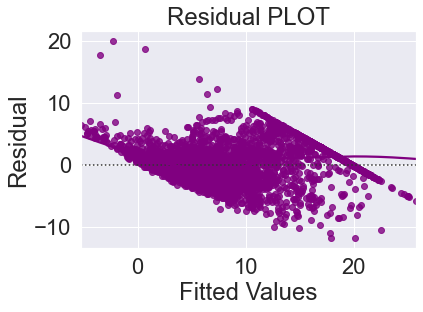

In [105]:

sns.residplot(fitted,residual,color="purple",lowess=True)
plt.xlabel("Fitted Values")
plt.ylabel("Residual")
plt.title("Residual PLOT")
plt.show()

TEST FOR NORMALITY
What is the test?

Error terms/Residuals should be normally distributed

If the error terms are non- normally distributed, confidence intervals may become too wide or narrow. Once confidence interval becomes unstable, it leads to difficulty in estimating coefficients based on minimization of least squares.

What do non-normality indicate?

It suggests that there are a few unusual data points which must be studied closely to make a better model.
How to Check the Normality?

It can be checked via QQ Plot, Residuals following normal distribution will make a straight line plot otherwise not.

Other test to check for normality : Shapiro-Wilk test.

What is the residuals are not-normal?

We can apply transformations like log, exponential, arcsinh etc as per our data

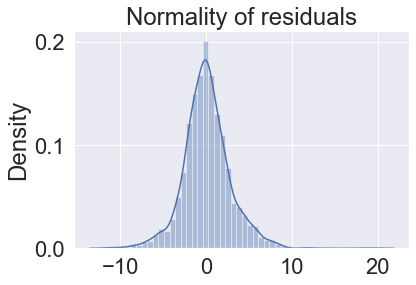

In [106]:
sns.distplot(residual)
plt.title('Normality of residuals')
plt.show()

he QQ plot of residuals can be used to visually check the normality assumption. The normal probability plot of residuals should approximately follow a straight line.

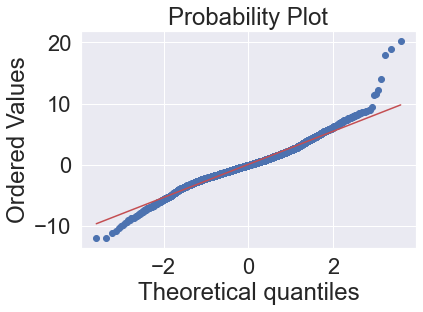

In [107]:
import pylab
import scipy.stats as stats
stats.probplot(residual,dist="norm",plot=pylab)
plt.show()

In [108]:
stats.shapiro(residual)

ShapiroResult(statistic=0.9721741676330566, pvalue=7.0277973301967435e-28)

The residuals are not normal as per shapiro test, but as per QQ plot they are approximately normal.
The issue with shapiro test is when dataset is big, even for small deviations, it shows data as not normal
Hence we go with QQ plot and say that residuals are normal
We can try to treat data for outliers and see if that helps in further normalising the residual curve

TEST FOR HOMOSCEDASTICITY
Test -goldfeldquandt test

Homoscedacity - If the variance of the residuals are symmetrically distributed across the regression line , then the data is said to homoscedastic.

Heteroscedacity - If the variance is unequal for the residuals across the regression line, then the data is said to be heteroscedastic. In this case the residuals can form an arrow shape or any other non symmetrical shape.

Null hypothesis : Residuals are homoscedastic

Alternate hypothesis : Residuals have hetroscedasticity

In [109]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(residual, X_train8)
lzip(name, test)

[('F statistic', 1.10015319748305), ('p-value', 0.01460522718234989)]

In [110]:
X_train8.columns

Index(['Kilometers_Driven', 'Power', 'New_Price', 'Location_Bangalore',
       'Location_Chennai', 'Location_Coimbatore', 'Location_Delhi',
       'Location_Hyderabad', 'Location_Jaipur', 'Location_Kochi',
       'Location_Mumbai', 'Location_Pune', 'Fuel_Type_Electric',
       'Fuel_Type_LPG', 'Fuel_Type_Petrol', 'Transmission_Manual',
       'Owner_Type_Second', 'Owner_Type_Third'],
      dtype='object')

In [112]:
X_test_final = X_test[X_train8.columns]

In [113]:
X_test_final.head()

,Kilometers_Driven,Power,New_Price,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Mumbai,Location_Pune,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Second,Owner_Type_Third
2868,69000,74.000,17.815,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
5924,26741,120.000,17.815,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
3764,86000,140.000,17.815,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
4144,52000,69.010,17.815,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0
2780,100000,91.720,17.815,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0


In [114]:
X_test_final.shape

(1806, 18)

Checking the performance on train and test: metric used - RMSE

In [115]:
#Checking root mean squared error on both train and test set  

from sklearn.metrics import mean_squared_error
rms = np.sqrt(mean_squared_error(y_train, fitted))
print('Train error:',rms)

rms1 = np.sqrt(mean_squared_error(y_test, pred))
print('Test error:',rms1)

Train error: 2.7442273928168053
Test error: 2.400225350292557


In [116]:
olsmod7 = sm.OLS(y_train, X_train8)
olsres7 = olsmod7.fit()
print(olsres7.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Price   R-squared (uncentered):                   0.919
Model:                            OLS   Adj. R-squared (uncentered):              0.918
Method:                 Least Squares   F-statistic:                              2631.
Date:                Fri, 09 Apr 2021   Prob (F-statistic):                        0.00
Time:                        11:16:03   Log-Likelihood:                         -10231.
No. Observations:                4213   AIC:                                  2.050e+04
Df Residuals:                    4195   BIC:                                  2.061e+04
Df Model:                          18                                                  
Covariance Type:            nonrobust                                                  
                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------

Observations
Now this is our final model which follows all the assumptions and this can be used for interpretations


# Forward Feature Selection
forward feature selection starts with an empty model and adds in variables one by one.¶
In each forward step, you add the one variable that gives the single best improvement to your model.

In [117]:
X_train_new = X_train8

We'll use forward feature selection on variables, we received after removing multicollinearity
Also we'll remove const term, because sklearn adds that automatically unlike statmodels

from mlxtend.feature_selection import SequentialFeatureSelector as sfs

In [118]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

In [119]:
clf = LinearRegression()

# Build step forward feature selection
sfs1 = sfs(clf,k_features = 18,forward=True,
           floating=False, scoring= 'r2',
           verbose=2,
           cv=5)

 # Perform SFFS
sfs1 = sfs1.fit(X_train_new, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    0.5s finished

[2021-04-09 11:16:18] Features: 1/18 -- score: 0.63909213408957[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:    0.4s finished

[2021-04-09 11:16:18] Features: 2/18 -- score: 0.6717036063147124[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.4s finished

[2021-04-09 11:16:19] Features: 3/18 -- score: 0.7106989036591221[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1

In [120]:
clf = LinearRegression()

# # Build step forward feature selection
sfs1 = sfs(clf,k_features = 17,forward=True,
           floating=False, scoring='r2',
           verbose=2,
           cv=5)

 # Perform SFFS
sfs1 = sfs1.fit(X_train_new, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    0.5s finished

[2021-04-09 11:16:35] Features: 1/17 -- score: 0.63909213408957[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:    0.4s finished

[2021-04-09 11:16:36] Features: 2/17 -- score: 0.6717036063147124[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.4s finished

[2021-04-09 11:16:36] Features: 3/17 -- score: 0.7106989036591221[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1

In [121]:
# Now Which features are important?
feat_cols = list(sfs1.k_feature_idx_)
print(feat_cols)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17]


In [122]:
X_train8.columns[feat_cols]

Index(['Kilometers_Driven', 'Power', 'New_Price', 'Location_Bangalore',
       'Location_Chennai', 'Location_Coimbatore', 'Location_Delhi',
       'Location_Hyderabad', 'Location_Jaipur', 'Location_Kochi',
       'Location_Mumbai', 'Location_Pune', 'Fuel_Type_LPG', 'Fuel_Type_Petrol',
       'Transmission_Manual', 'Owner_Type_Second', 'Owner_Type_Third'],
      dtype='object')

In [123]:
X_train_final = X_train8[X_train8.columns[feat_cols]]

In [124]:
X_test.columns

Index(['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats',
       'New_Price', 'Location_Bangalore', 'Location_Chennai',
       'Location_Coimbatore', 'Location_Delhi', 'Location_Hyderabad',
       'Location_Jaipur', 'Location_Kochi', 'Location_Kolkata',
       'Location_Mumbai', 'Location_Pune', 'Fuel_Type_Diesel',
       'Fuel_Type_Electric', 'Fuel_Type_LPG', 'Fuel_Type_Petrol',
       'Transmission_Manual', 'Owner_Type_Fourth & Above', 'Owner_Type_Second',
       'Owner_Type_Third'],
      dtype='object')

In [125]:
#Creating new x_test with the same 17 variables that we selected for x_train
X_test_final = X_test[X_train_final.columns]

In [126]:
#Fitting linear model

from sklearn.linear_model import LinearRegression
linearregression = LinearRegression()                                    
linearregression.fit(X_train_final, y_train)                                  

print("Intercept of the linear equation:", linearregression.intercept_) 
print("\nCOefficients of the equation are:", linearregression.coef_)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

predicted = linearregression.predict(X_train_final)
pred = linearregression.predict(X_test_final)     

Intercept of the linear equation: [3.67838546]

COefficients of the equation are: [[-3.92966044e-05  6.59718547e-02  5.64537356e-02  2.26928002e+00
   1.34428128e+00  2.77817680e+00  9.59097300e-01  2.03060482e+00
   1.54813035e+00  2.03522932e+00  8.76336805e-01  1.35494836e+00
  -2.81157436e+00 -2.87380467e+00 -2.71675966e+00 -9.19586512e-01
  -1.71353702e+00]]


In [127]:
# R2 Squared: on train and test
print('r2 score on train data :', r2_score(y_train, predicted))
print('r2 score on test data :', r2_score(y_test, pred))

r2 score on train data : 0.7800300832373825
r2 score on test data : 0.7773597977030666


In [128]:
# RMSE on train and test data
print('rmse on train data :', mean_squared_error(y_train, predicted)**0.5)
print('rmse on test data :', mean_squared_error(y_test, pred)**0.5)

rmse on train data : 2.6948044086600254
rmse on test data : 2.748092370513915


#  Model improvement using PolynomialFeatures



In [129]:
#Fitting linear mode with PolynomialFeatures¶
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

In [130]:
poly=PolynomialFeatures(degree=2,interaction_only=True)

In [131]:
X_train2=poly.fit_transform(X_train)
X_test2=poly.fit_transform(X_test)

In [132]:
poly_lr=linear_model.LinearRegression()
poly_lr.fit(X_train2,y_train)
y_pred=poly_lr.predict(X_test2)

In [133]:
# R2 Squared: on train 
poly_lr.score(X_train2,y_train)

0.8778409857078115

In [134]:
# R2 Squared: on test
poly_lr.score(X_test2,y_test)

0.8627848257325899

In [135]:
for idx,col_name in enumerate(X_train.columns):
    print(" coffcient  {} is{} ".format(col_name,poly_lr.coef_[0][idx]))

 coffcient  Year is-1.5644378239990013e-05 
 coffcient  Kilometers_Driven is-0.005064831841073933 
 coffcient  Mileage is2.670414985284047e-05 
 coffcient  Engine is0.0027189786059186225 
 coffcient  Power is-0.01133203372319503 
 coffcient  Seats is-0.36506253127251403 
 coffcient  New_Price is-4.199099905289958e-08 
 coffcient  Location_Bangalore is0.6835774530630998 
 coffcient  Location_Chennai is1.6577266044689778 
 coffcient  Location_Coimbatore is8.759168932969231 
 coffcient  Location_Delhi is15.035899008945869 
 coffcient  Location_Hyderabad is6.853553272182087 
 coffcient  Location_Jaipur is-0.33647603278133054 
 coffcient  Location_Kochi is-3.52641664791744 
 coffcient  Location_Kolkata is0.18019476369689985 
 coffcient  Location_Mumbai is5.324417671180055 
 coffcient  Location_Pune is5.8143298666924546 
 coffcient  Fuel_Type_Diesel is4.034853862699403 
 coffcient  Fuel_Type_Electric is-5.995124831233014 
 coffcient  Fuel_Type_LPG is-8.589833389276687e-08 
 coffcient  Fuel_T

# Model regulation using Ridge and Lasso 

In [136]:
# find the best parameters using GridSearchCV  for RIDGE
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(X,y)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             scoring='neg_mean_squared_error')

In [137]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 0.01}
-5.629344135505284


In [138]:
# find the best parameters using GridSearchCV  for LASSO

from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
lasso=Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)

lasso_regressor.fit(X,y)
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 1e-08}
-5.629370960747887


In [139]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [140]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [141]:
#Create a regularized RIDGE model and note the coefficients
ridge = Ridge(alpha=.01)
ridge.fit(X_train,y_train)
print ("Ridge model:", (ridge.coef_))
  

Ridge model: [[ 5.15901041e-01 -2.12612995e-05 -1.59812430e-01  1.55544411e-03
   4.09696062e-02  0.00000000e+00  8.60040966e-02  9.04588163e-01
   7.18169343e-02  6.38015391e-01 -4.15162020e-01  8.05462619e-01
   8.12568724e-02 -6.94789087e-03 -1.45249770e+00 -5.91019410e-01
  -1.49359842e-01  5.84683022e-01  5.31710304e+00 -1.09951926e+00
  -1.66535673e+00 -2.68787927e+00 -4.08456620e-01 -2.87496032e-01
  -4.00409333e-02]]


In [142]:
print(ridge.score(X_train, y_train))
print(ridge.score(X_test, y_test))

0.8316782993447251
0.8342006623427738


In [143]:
#Create a regularized LASSO model and note the coefficients
lasso = Lasso(alpha=.11e-8)
lasso.fit(X_train,y_train)
print ("Lasso model:", (lasso.coef_))

Lasso model: [ 5.15904194e-01 -2.12610829e-05 -1.59815875e-01  1.55532391e-03
  4.09708075e-02  0.00000000e+00  8.60036597e-02  9.04611590e-01
  7.18153400e-02  6.38013861e-01 -4.15169884e-01  8.05483939e-01
  8.12487221e-02 -6.96512977e-03 -1.45255167e+00 -5.91114888e-01
 -1.49352107e-01  5.85531429e-01  5.37129956e+00 -1.10054729e+00
 -1.66453746e+00 -2.68782950e+00 -4.08995794e-01 -2.87483781e-01
 -4.00269484e-02]


In [144]:
print(lasso.score(X_train, y_train))
print(lasso.score(X_test, y_test))

0.8316783202470496
0.8342030394943352


###  More or less similar results but with less complex models.  Complexity is a function of variables and coefficients
### Note - with Lasso, we get equally good result in test though not so in training.  Further, the number of dimensions is much lesS  in LASSO model than ridge or un-regularized model


##  Summary of most important factors used by the ML for prediction


Both r2 score and RMSE shows that model fitted is good, has no overfitting and can be used for making predictions
we can observe here, the results from 'olsreg7' and 'linearegession' model are approximately same
In case when we have lots of features, instead of removing features on the basis of p values manually, we can go for forward selection also
Appendix:
warnings.filterwarnings("ignore") : Never print matching warnings.

Pandas : Pandas is an open source library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language.

Numpy : The fundamental package for scientific computing with Python.

Matplotlib : Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python.

Seaborn : Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

pairplot : Plot pairwise relationships in a dataset.

boxplot : Draw a box plot to show distributions with respect to categories.

distplot : Flexibly plot a univariate distribution of observations.

pandas.DataFrame.corr : Compute pairwise correlation of columns, excluding NA/null values.

sklearn.linear_model.LinearRegression : Ordinary least squares Linear Regression.

scipy.stats : This module contains a large number of probability distributions as well as a growing library of statistical functions.

statsmodels : It is a Python module that provides classes and functions for the estimation of many different statistical models, as well as for conducting statistical tests, and statistical data exploration.

An extensive list of result statistics are available for each estimator.
The results are tested against existing statistical packages to ensure that they are correct.
The online documentation is hosted at statsmodels.org.
​

###  Business Insights and Recommendations

#### 1.Used vehicle market involves many factors when it comes to predicting the fast-selling vehicles that maintain profit and reduce inventory cost for the retailers. transmission, vehicle type, Brand, model, mileage, cost, and vehicle ages are some of the significant factors we had a chance to analyze that affect the time a used vehicle stays in the lot. In general, the customer’s preference is varied and complex. However, there are some characteristics that are highly desirable among used vehicles that can prioritize to purchase:

#### 2. In Economy  and Family-type Highly demanded vehicle brands are   Maruthi, Hyundai, Honda and Toyota.

#### 3. Luxury  brands Highly demanded vehicle brands are   BMW,Audi and Mercedes-Benz.

#### 4. Economy  and Family-type vehicles are sold faster than Luxury  brands.

#### 5. Car4U should avoid Opel Cirsa, Hindustan, Bentley since these brands are quite unpopular and take a very long time to sell.

####  6.Economy and Family-type vehicles are sold faster than Luxury  brands.

#### 7. Location affects sales days significantly. When purchasing and selling used vehicles in the low-selling citys such as Ahmedabad and Jaipur.

#### 8. Car4U should focus on other highly desirable characteristics that, brands, low mileage and Years.

#### 9. Car4U  should prefer to purchase vehicles that have small mileage, low cost and small age when it comes to choosing between 2 equivalent vehicles in term of other characteristics.

####  10. Future research is recommended to explore other factors that influence the sales period of a used vehicle. For example, the level of fuel-efficiency, whether the vehicle is electric or hybrid, level of discount from the original price,… Incorporating these factors in the analysis can improve the accuracy to choose non-overage vehicles and have a positive impact on profit.